**Forecasting Stock Prices Using Time Series, Machine Learning, and Deep Learning Models**

*Introduction*

Forecasting stock prices is an increasingly critical and challenging task in financial markets due to the inherent volatility and complex dynamics of stock data. Accurate predictions enable investors, analysts, and policymakers to make informed decisions, minimizing risks and maximizing returns. The unpredictability of financial markets, compounded by various macroeconomic and geopolitical factors, makes forecasting stock prices both a science and an art. Traditional approaches such as the Autoregressive Integrated Moving Average (ARIMA) have long been the foundation of time series forecasting, providing robust predictions in stationary and linear contexts. However, the limitations of these methods in capturing non-linear and non-stationary patterns have driven a shift towards advanced machine learning and deep learning techniques, which are better suited to handle complex, high-dimensional datasets (Chatterjee et al., 2021; Yamak et al., 2019; Siami-Namini et al., 2019).

Modern methods like Long Short-Term Memory (LSTM) networks and Bidirectional LSTM (BiLSTM) have demonstrated superior capabilities in modelling long-term dependencies and non-linear patterns in financial data (Lawi et al., 2022). These architectures excel in recognizing temporal dependencies, making them highly effective for sequential data analysis. Additionally, models like Prophet, N-BEATS, and DeepAR have introduced innovations tailored for financial forecasting, leveraging probabilistic modelling, neural architectures, and attention mechanisms to enhance predictive accuracy (Salinas et al., 2020; Oreshkin et al., 2019; Taylor and Letham, 2018). Emerging techniques such as Temporal Convolutional Networks (TCN) and hybrid architectures combining GRU and attention mechanisms also offer promising alternatives, improving both efficiency and accuracy in processing large-scale data (Chen et al., 2024).

This study focuses on the forecasting of stock prices for ten leading companies: Microsoft Corp., Nvidia Corp., Alphabet Inc., Amazon.com Inc., Meta Platforms Inc., Taiwan Semiconductor Manufacturing Co. Ltd., ASML Holding NV, Adobe Inc., IBM, and Arista Networks Inc. These companies represent a significant portion of the technological and innovation-driven economy, often serving as indicators of broader market trends. Using data collected via the Yahoo Finance API, this research employs various forecasting models, including ARIMA, LSTM, BiLSTM, N-BEATS, Prophet, DeepAR, and TCN. Each model's effectiveness will be rigorously compared to identify the most suitable approach for stock price prediction (Pant et al., 2024).

Objectives

The objectives of this project are as follows:

- To evaluate and compare the performance of multiple time series forecasting models, including traditional, machine learning, and deep learning approaches, in predicting stock prices.

- To identify the most suitable forecasting model for predicting stock prices of the selected companies based on accuracy, robustness, and computational efficiency.

*Who Will Benifit*

The findings of this project will benefit the following stakeholders:

- Investors: By providing accurate predictions, investors can make more informed decisions about buying, holding, or selling stocks, thereby minimizing risks and maximizing returns. This project will also help retail investors understand the application of advanced predictive models.

- Financial Analysts: The study will offer a comparative analysis of forecasting models, helping analysts understand the strengths and limitations of different approaches, thereby enhancing their analytical toolkits.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


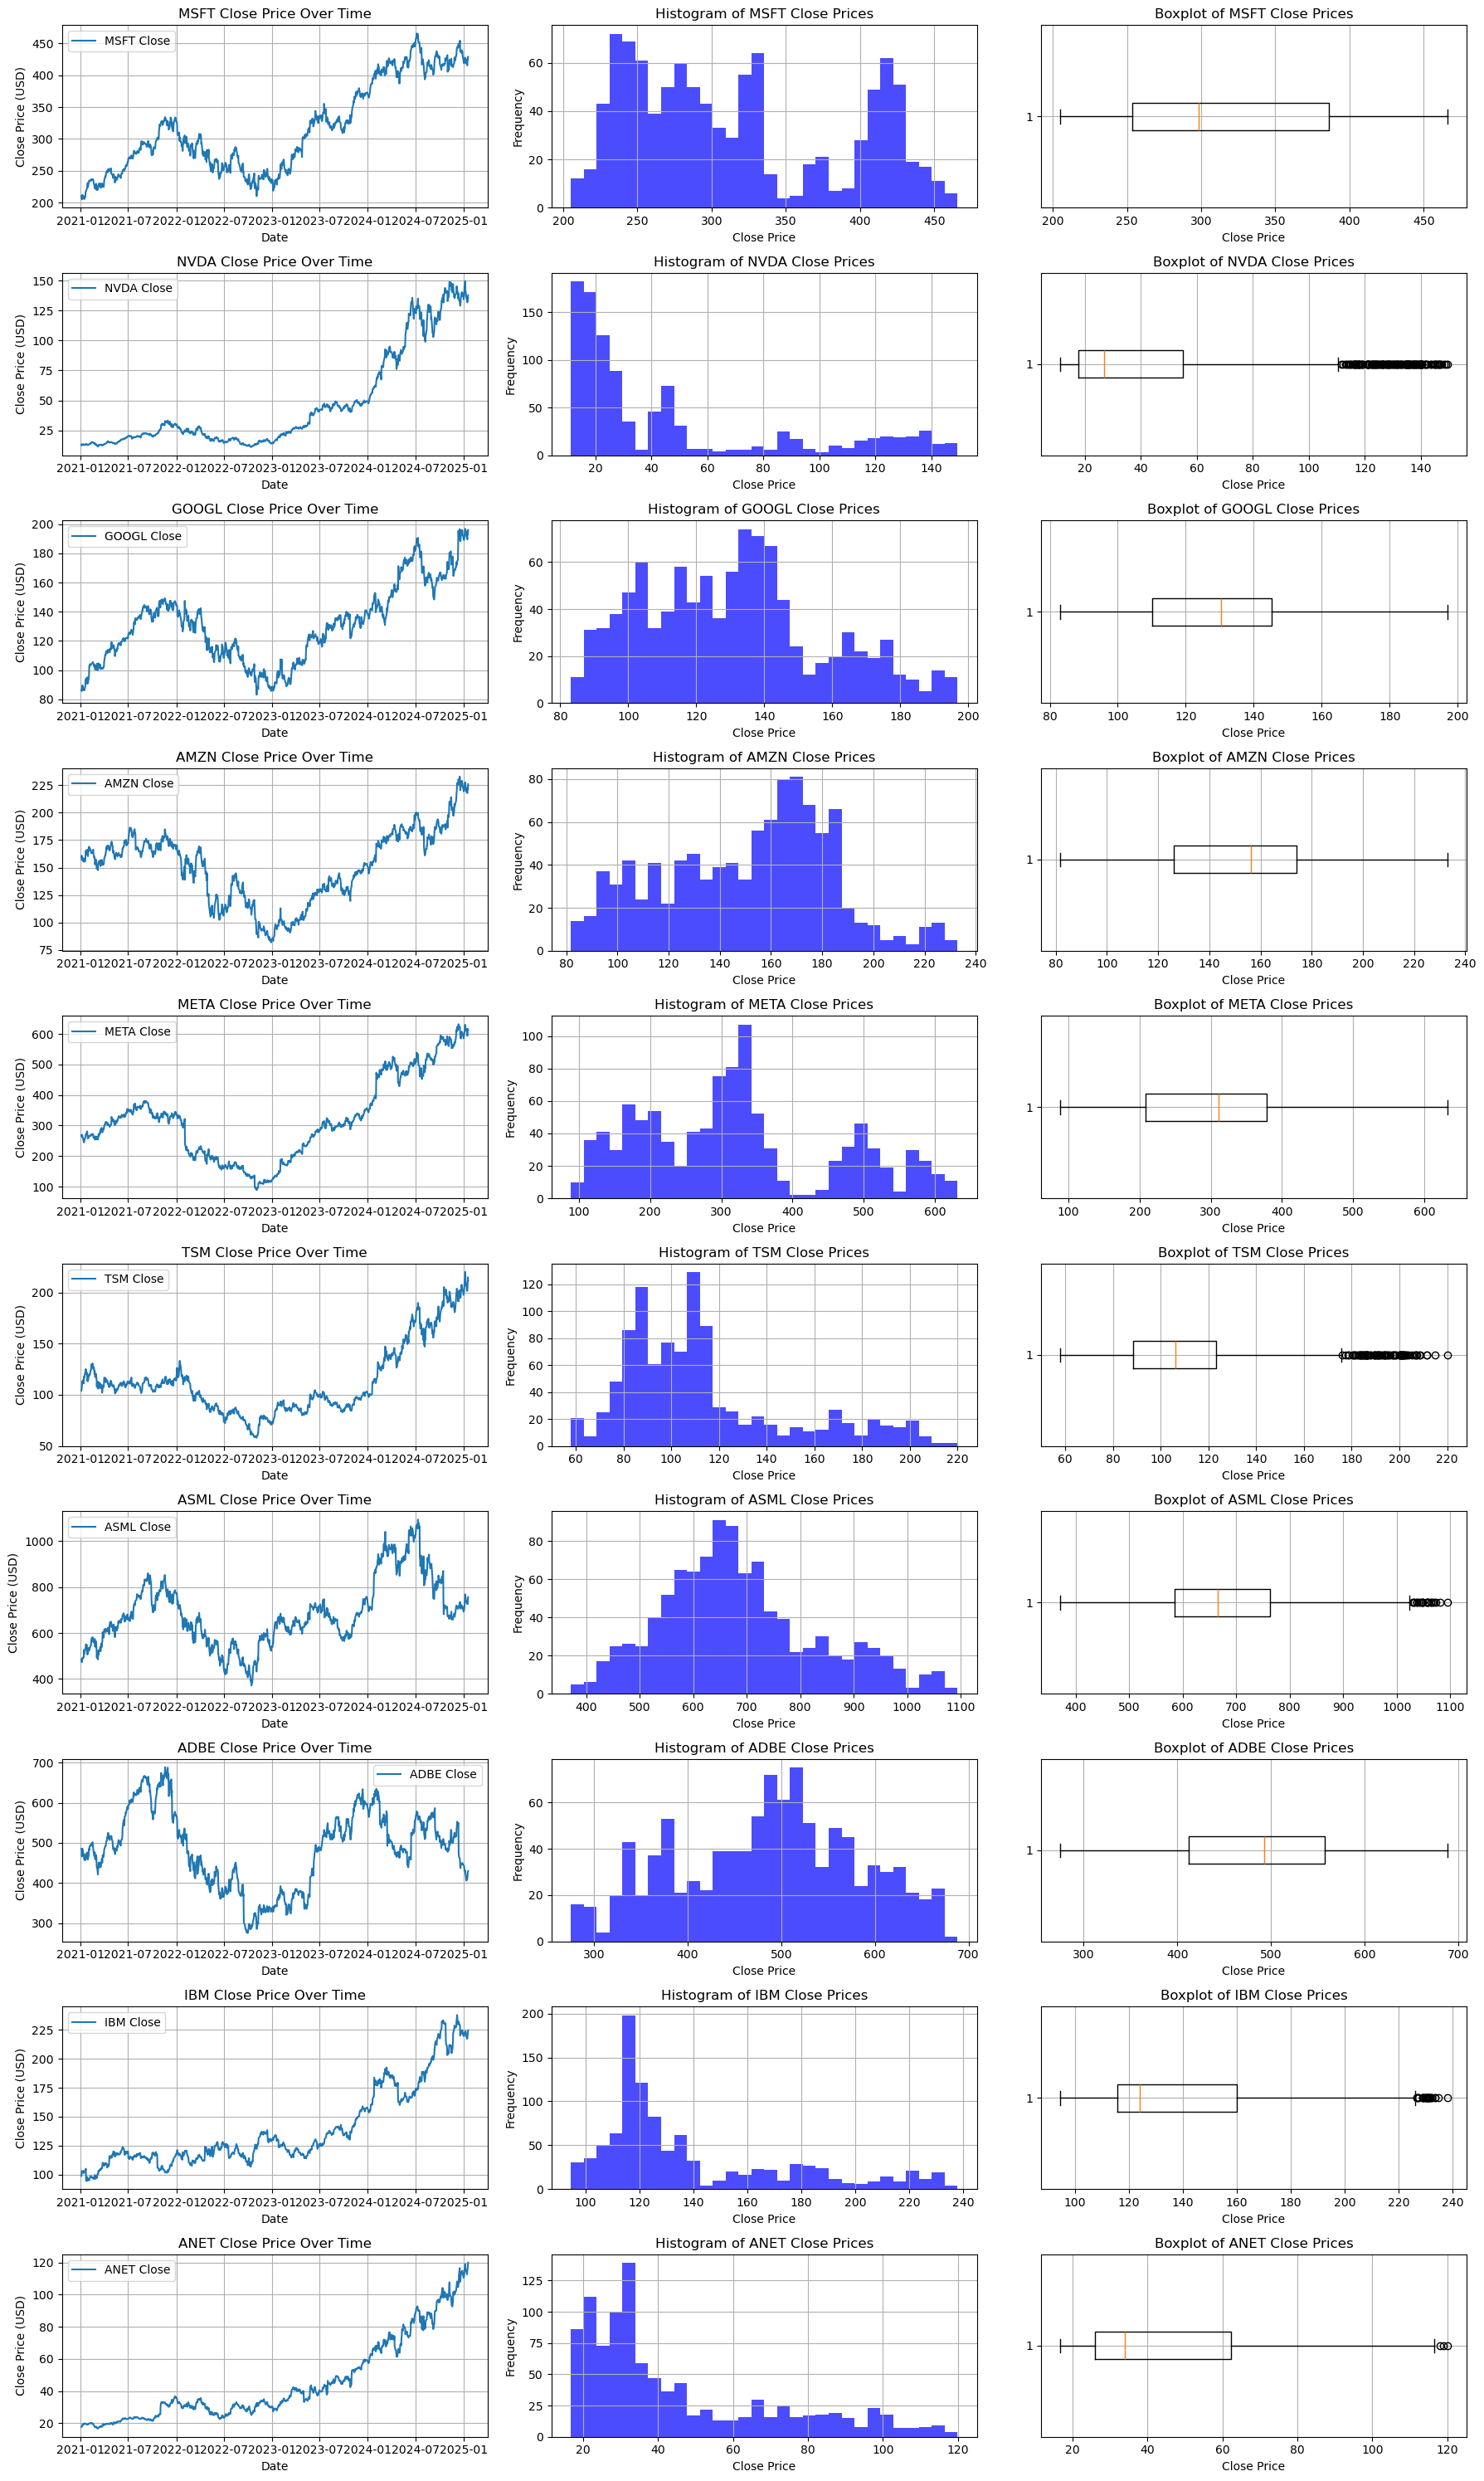

Summary statistics for all tickers:
Ticker         MSFT         NVDA        GOOGL         AMZN         META  \
count   1016.000000  1016.000000  1016.000000  1016.000000  1016.000000   
mean     316.317837    46.645093   130.697540   150.683590   320.469323   
std       70.638368    40.564699    26.311657    33.004210   135.992043   
min      205.164688    11.215970    83.128662    81.820000    88.571671   
25%      253.580017    17.737527   110.044327   125.980003   208.324203   
50%      298.590469    26.753586   130.442139   156.336250   310.598541   
75%      385.834778    55.114124   145.243851   174.132748   378.255096   
max      465.786438   149.429993   196.869995   232.929993   632.170044   

Ticker          TSM         ASML         ADBE          IBM         ANET  
count   1016.000000  1016.000000  1016.000000  1016.000000  1016.000000  
mean     113.216848   685.942400   486.227500   139.148421    45.421213  
std       34.740380   144.831399    96.270061    35.198033    25.8

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# tickers
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = '2021-01-01'

def download_data(tickers, start):
    all_data = {}
    data = pd.DataFrame()   
    for ticker in tickers:
        #print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data=pd.concat([data,df['Close']],axis=1)
    return data

# Download the data
data_df = download_data(tickers, start_date)

# storing the data in a csv file
#data_df.to_csv('data.csv')

# a grid layout of the plots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18, 30))
axes = axes.flatten()

# plots
for i, ticker in enumerate(tickers):
    # Line plot
    axes[i*3].plot(data_df.index, data_df[ticker], label=f"{ticker} Close")
    axes[i*3].set_title(f"{ticker} Close Price Over Time")
    axes[i*3].set_xlabel("Date")
    axes[i*3].set_ylabel("Close Price (USD)")
    axes[i*3].legend()
    axes[i*3].grid()

    # histogram
    axes[i*3+1].hist(data_df[ticker].dropna(), bins=30, color='blue', alpha=0.7)
    axes[i*3+1].set_title(f"Histogram of {ticker} Close Prices")
    axes[i*3+1].set_xlabel("Close Price")
    axes[i*3+1].set_ylabel("Frequency")
    axes[i*3+1].grid()

    # boxplot
    axes[i*3+2].boxplot(data_df[ticker].dropna(), vert=False)
    axes[i*3+2].set_title(f"Boxplot of {ticker} Close Prices")
    axes[i*3+2].set_xlabel("Close Price")
    axes[i*3+2].grid()


plt.tight_layout()
plt.show()

print("Summary statistics for all tickers:")
print(data_df.describe())

In [3]:
# the number of missing values
data_df.isnull().sum()

Ticker
MSFT     0
NVDA     0
GOOGL    0
AMZN     0
META     0
TSM      0
ASML     0
ADBE     0
IBM      0
ANET     0
dtype: int64

The data contains no missing values. 

<Axes: xlabel='Date'>

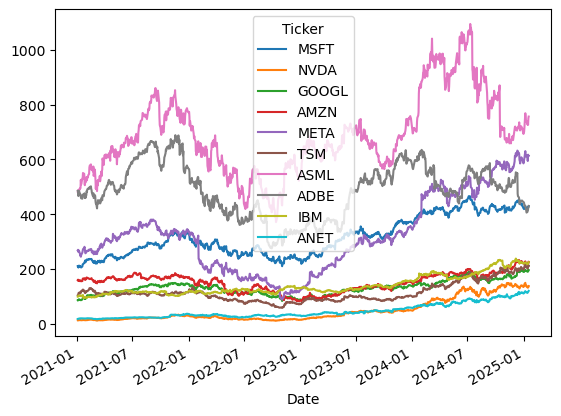

In [4]:
data_df.plot()

In the plot above we can see that almost all the companies suffer from a decline in their stock price inaround 2022 which could be due to COVID. A suggestion could be that the models and analysis is beeter to start after the COVID decline. 

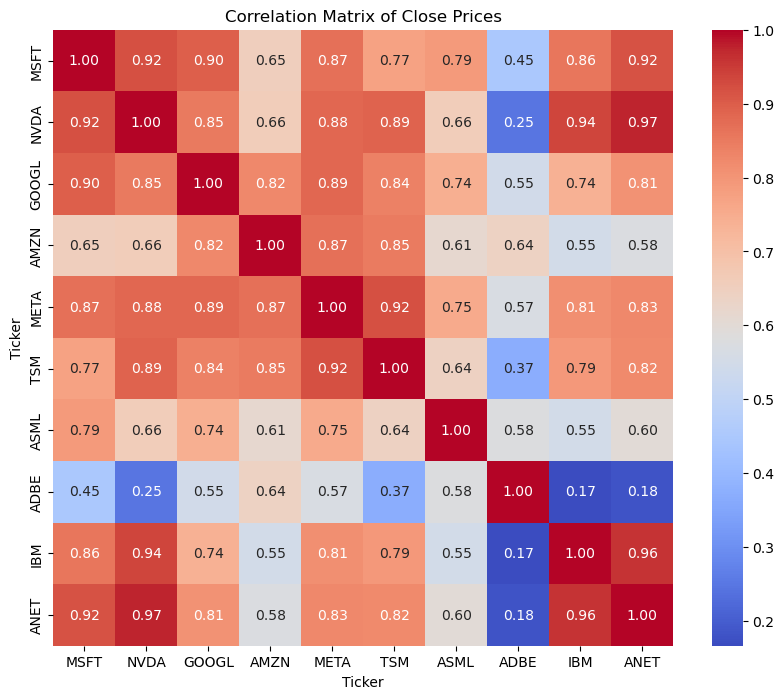

Ticker      MSFT      NVDA     GOOGL      AMZN      META       TSM      ASML  \
Ticker                                                                         
MSFT    1.000000  0.918929  0.897373  0.653237  0.869110  0.773867  0.791109   
NVDA    0.918929  1.000000  0.851463  0.661160  0.883352  0.891981  0.659565   
GOOGL   0.897373  0.851463  1.000000  0.824216  0.885852  0.838111  0.742829   
AMZN    0.653237  0.661160  0.824216  1.000000  0.868971  0.848767  0.613155   
META    0.869110  0.883352  0.885852  0.868971  1.000000  0.919736  0.754827   
TSM     0.773867  0.891981  0.838111  0.848767  0.919736  1.000000  0.641978   
ASML    0.791109  0.659565  0.742829  0.613155  0.754827  0.641978  1.000000   
ADBE    0.446932  0.246893  0.545754  0.639222  0.569624  0.371170  0.579220   
IBM     0.856755  0.936327  0.737984  0.547776  0.811139  0.792490  0.548544   
ANET    0.915541  0.974511  0.807671  0.576311  0.826055  0.822653  0.598513   

Ticker      ADBE       IBM      ANET  


In [5]:
correlation_matrix = data_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Close Prices")
plt.show()
print(correlation_matrix)

The stock prices are highly correlated to each other.

**Chapter 3: Literature Review**

Forecasting stock prices has evolved significantly, driven by the need to address the complexities and volatility of financial markets. Traditional methods like the Autoregressive Integrated Moving Average (ARIMA) have been foundational for modeling linear time series patterns, but their limitations in handling non-linearity and non-stationarity have prompted a shift toward machine learning (ML) and deep learning (DL) approaches. This review provides a comprehensive synthesis of existing literature, highlighting key advancements, limitations, and lessons relevant to forecasting stock prices for leading technology companies such as Microsoft, Nvidia, Alphabet, and others.

*Focused Literature Review Relevant to the Research Questions*

This research aims to evaluate the performance of traditional, ML, and DL models in financial forecasting, addressing their effectiveness, limitations, and suitability for predicting stock prices.

*Traditional Statistical Models*

ARIMA has been extensively used for financial forecasting due to its simplicity and effectiveness in linear, stationary data scenarios (Siami-Namini et al., 2019)A Comparative Analysis …. Seasonal ARIMA (SARIMA) variants incorporate seasonality to enhance predictive power (Chen et al., 2024)An improved deep tempor…. However, these models often fail to capture the non-linear, chaotic dynamics of stock prices, making them less suitable for long-term or complex forecasting.

*Machine Learning Approaches*

ML techniques like Support Vector Machines (SVMs), Random Forest (RF), and eXtreme Gradient Boosting (XGBoost) offer flexibility in modeling non-linear relationships (Lawi et al., 2022; Chauhan et al., 2021)Implementation of Long …Indian Stock Market Pre…. Hybrid methods, such as ARIMA-LS-SVM, achieve improved accuracy by integrating statistical and ML models. However, their reliance on feature engineering, sequential dependency limitations, and high computational costs constrain their utility in time series forecasting.

*Deep Learning Models*
DL approaches have revolutionized financial forecasting with their ability to handle high-dimensional, sequential data. Recurrent Neural Networks (RNNs) and their advanced variants, Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU), excel in capturing temporal dependencies and non-linear patterns (Chen et al., 2024; Lawi et al., 2022)

•	*LSTM and GRU*: LSTMs are particularly effective for long-term dependencies, while GRUs, with fewer parameters, offer computational efficiency for resource-constrained environments (Yavasani and Wang, 2023; Chen et al., 2024)

•	*BiLSTM*: Bidirectional LSTM (BiLSTM) models improve accuracy by processing sequences in forward and backward directions, enabling better context understanding (Siami-Namini et al., 2019; Patel et al., 2020)A Comparative Analysis …Comparative Study of Pr….

*Emerging DL Models*

Innovative architectures such as N-BEATS, DeepAR, and Temporal Convolutional Networks (TCNs) have expanded the 

*DL landscape*:

•	Prophet: Designed for ease of use, Prophet integrates domain knowledge for accurate predictions in business contexts (Taylor and Letham, 2018)forecasting at scale.

•	N-BEATS: This interpretable neural network excels in decomposing trend and seasonality, achieving state-of-the-art performance on benchmark datasets (Oreshkin et al., 2019).

•	DeepAR: A probabilistic model based on RNNs, DeepAR effectively handles large-scale time series datasets (Salinas et al., 2020).

•	TCNs: Temporal Convolutional Networks offer efficiency in capturing long-term dependencies, with faster training and greater stability than RNNs (Chen et al., 2024; Lea et al., 2017).

Limitations of Available Solutions and Approaches
While these advancements have pushed the boundaries of financial forecasting, each method has its limitations:

1.	Traditional Models:
-	Struggle with non-linear and non-stationary data prevalent in financial markets.

-	Limited scalability for high-dimensional and long-term forecasting tasks.

-	Dependence on data preprocessing to meet linearity and stationarity assumptions.

2.	*Machine Learning Models*:

-	Heavy reliance on feature engineering and domain expertise.

-	Inability to capture temporal dependencies effectively, particularly in longer sequences.

-	Computationally expensive tuning processes.

3.	*Deep Learning Models*:

-	Require large datasets and extensive computational resources.

-	High risk of overfitting with complex architectures.

-	Lack of interpretability can hinder trust in decision-making contexts.

4.	*Hybrid and Emerging Models*:

-	Hybrid approaches demand significant manual tuning, making them resource-intensive.

-	Probabilistic models like DeepAR depend on the availability of large-scale datasets.

**Summary of Lessons from the Literature**

1.	*Model Selection and Customization*:

-	DL models such as LSTM, GRU, and BiLSTM excel in capturing temporal dependencies and non-linearities.

-	Emerging architectures like N-BEATS and TCNs provide enhanced scalability and interpretability.

2.	*Data Challenges*:
-	Incorporating external factors like macroeconomic indicators and market sentiment improves predictive accuracy.

-	Robust preprocessing techniques (e.g., normalization and deseasonalization) are crucial for handling raw data.

3.	*Evaluation Metrics and Probabilistic Insights*:

-	While common metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE) measure accuracy, probabilistic forecasts (e.g., DeepAR) offer valuable insights into uncertainties.

4.	Ensemble and Hybrid Approaches:

-	Combining models or creating ensembles often yields better results than relying on single architectures.



**Data Source and Description**

The data utilized for this research was retrieved from Yahoo Finance, a widely recognized source for financial datasets. The dataset includes historical stock prices of ten leading technology companies: Microsoft Corp. (MSFT), Nvidia Corp. (NVDA), Alphabet Inc. (GOOGL), Amazon.com Inc. (AMZN), Meta Platforms Inc. (META), Taiwan Semiconductor Manufacturing Co. Ltd. (TSM), ASML Holding NV (ASML), Adobe Inc. (ADBE), International Business Machines Corp. (IBM), and Arista Networks Inc. (ANET). 

Each dataset encompasses various financial attributes, such as:

-	Open: The stock's opening price for a given trading day.

-	High: The highest price of the stock for the trading day.

-	Low: The lowest price of the stock for the trading day.

-	Close: The stock's closing price.

-	Volume: The number of shares traded during the day.

-	Adj Close (adjusted closing price): Historical data adjusted for stock splits, dividends, and rights offerings.


However, the newer versions of Yahoo Finance’s API do not include an explicit "Adj Close" column. Therefore, we rely on the "Close" column as the primary variable for analysis and forecasting. This focus ensures uniformity and compatibility across all datasets.

4.2 *Classification of Variables*
The variables in the dataset can be classified into two categories:

1.	*Independent Variables*:
-	Volume

-	High

-	Low

-	Open


2.	Dependent Variable:

-	Close (used as the target for forecasting models)


This classification allows us to analyze how trading volume and price movements during the day influence the closing prices of the stocks.


4.3 *Data Import and Cleaning*

The data cleaning process ensures the integrity and usability of the dataset for analysis and modeling. Below are the steps undertaken:

1.	*Data Import*: Using the yfinance library in Python, historical stock data for the ten companies was downloaded programmatically. The code snippet below illustrates the data import process:




In [6]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = ['MSFT', 'NVDA', 'GOOGL', 'AMZN', 'META', 'TSM', 'ASML', 'ADBE', 'IBM', 'ANET']
data = {}

# Download data for each ticker
for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2021-01-01')

# Store data in a dictionary
stocks_df = {ticker: data[ticker][['Open', 'High', 'Low', 'Close', 'Volume']] for ticker in tickers}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**Data Cleaning**

1.	*Handling Missing Values*:

-	Missing values were identified and filled using forward fill (propagating the last valid observation forward).

-	Stocks with extensive missing data were excluded or analyzed individually to ensure their absence did not bias results.


In [7]:
for ticker in stocks_df:
    stocks_df[ticker].fillna(method='ffill', inplace=True)


/var/folders/vc/3kfwh15d7234657gp2jqxqj80000gn/T/ipykernel_57442/2102796028.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_df[ticker].fillna(method='ffill', inplace=True)


2.	Outlier Detection and Treatment:

-	Boxplot Analysis: Outliers in the "Close" column were identified using boxplots. Stocks like NVDA displayed noticeable outliers.

-	Decision: Since the dataset represents time series data, removing outliers may disrupt trends. Instead, transformations (e.g., logarithmic scaling) were considered where necessary.


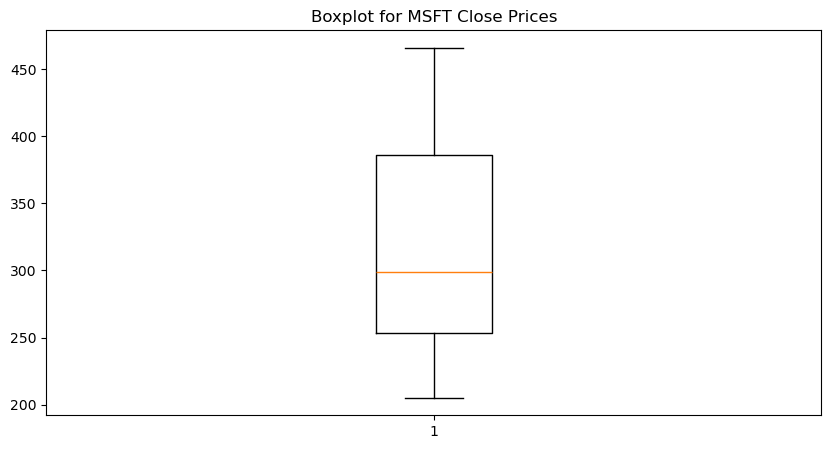

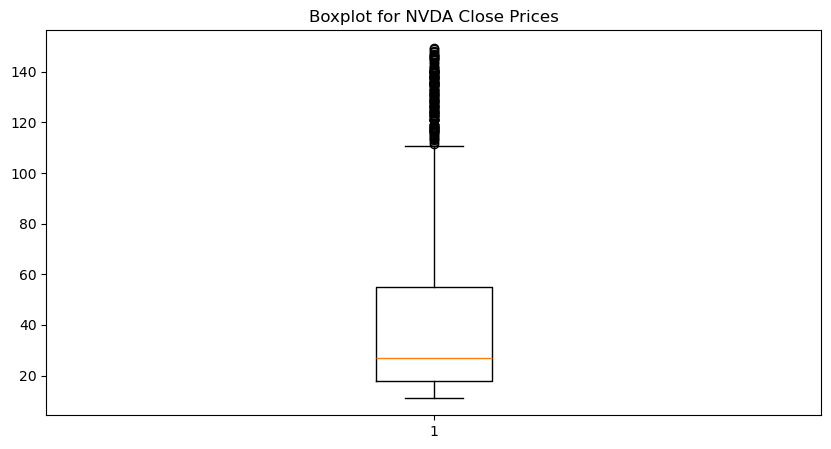

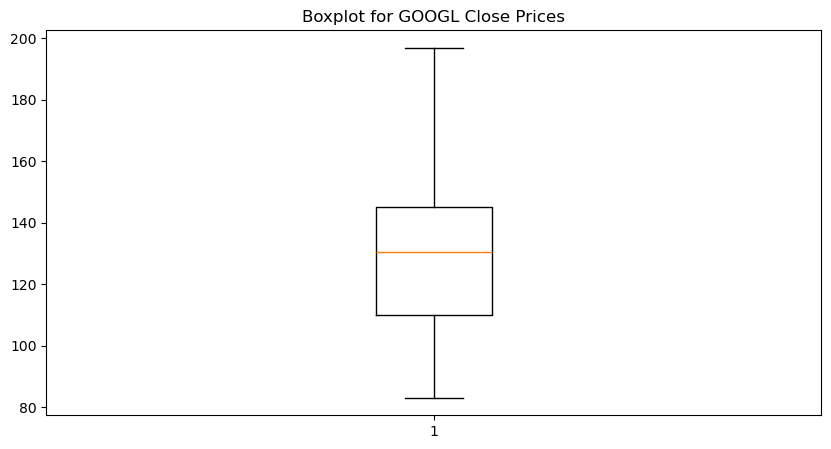

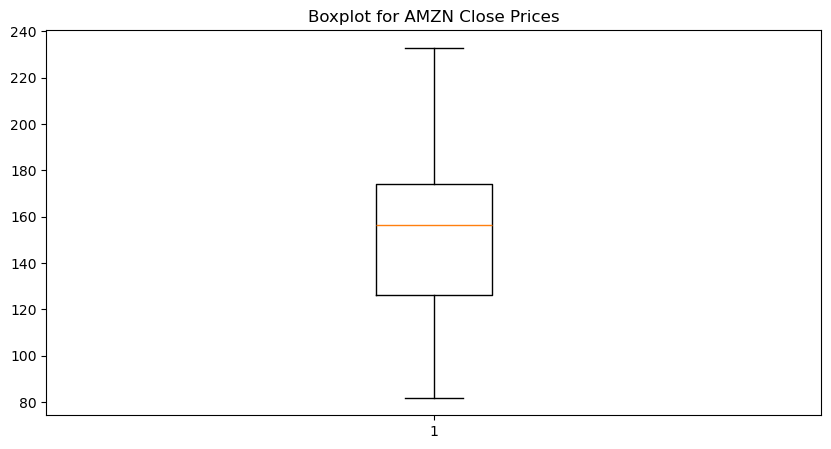

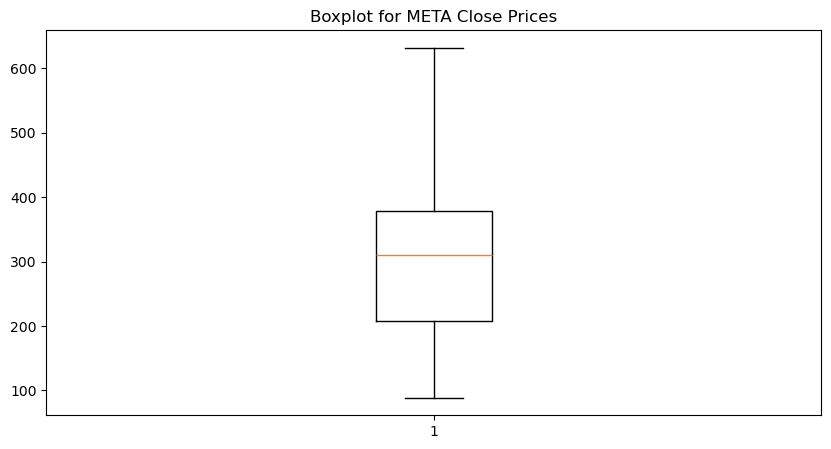

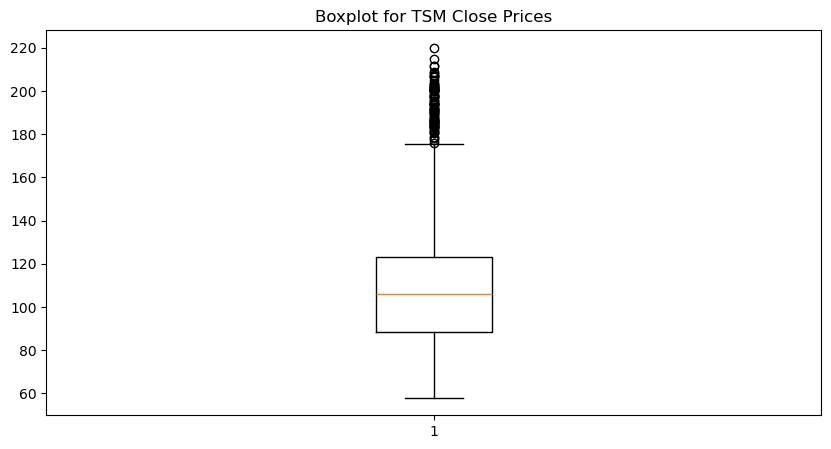

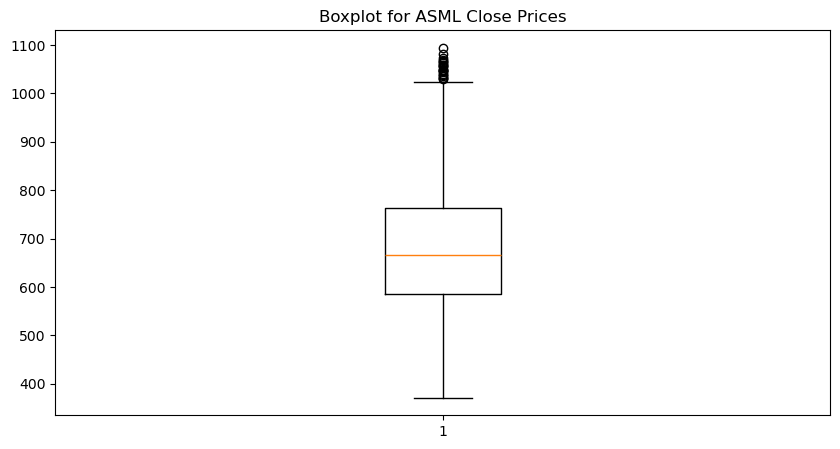

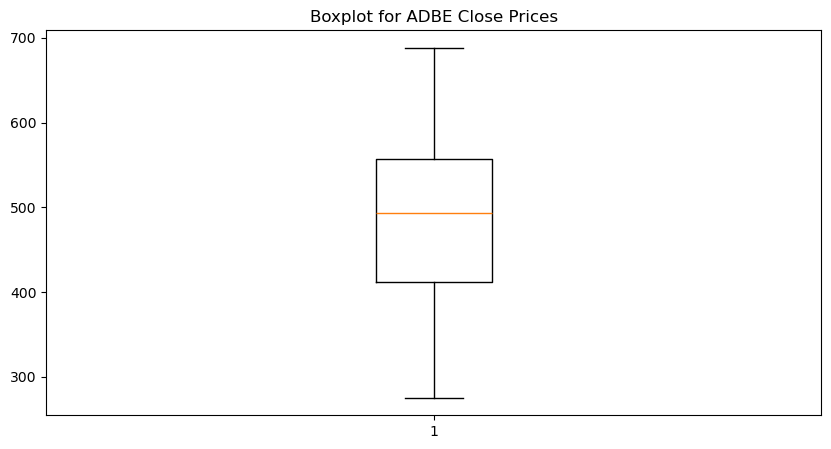

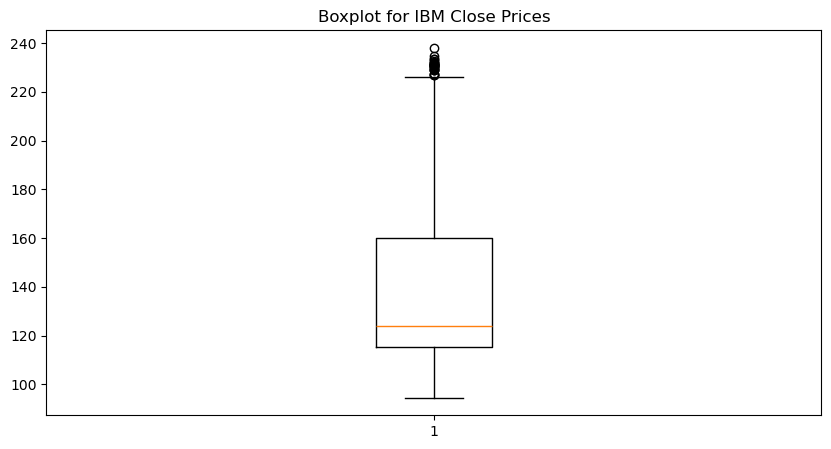

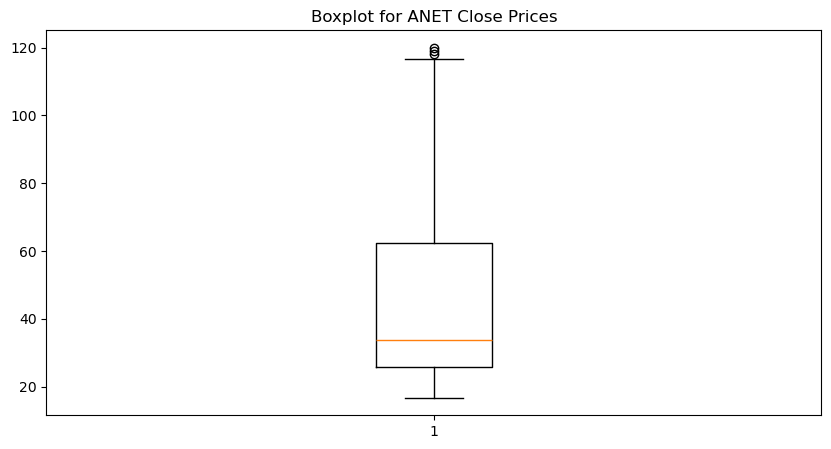

In [8]:
import matplotlib.pyplot as plt
#Boxplot for outlier detection

for ticker in stocks_df:
    plt.figure(figsize=(10, 5))
    plt.title(f"Boxplot for {ticker} Close Prices")
    plt.boxplot(stocks_df[ticker]['Close'].dropna())
plt.show()



3. Stationarity Check:

Stationarity tests, such as the Augmented Dickey-Fuller (ADF) test, were conducted to determine if the time series data required differencing or detrending.


In [9]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Returns True if stationary

for ticker in stocks_df:
    print(f"{ticker} Stationarity: {check_stationarity(stocks_df[ticker]['Close'])}")

MSFT Stationarity: False
NVDA Stationarity: False
GOOGL Stationarity: False
AMZN Stationarity: False
META Stationarity: False
TSM Stationarity: False
ASML Stationarity: False
ADBE Stationarity: False
IBM Stationarity: False
ANET Stationarity: False




Data Integration

For comparative analysis, a consolidated dataset was created by merging the data for all tickers into a multi-index DataFrame:



In [10]:
tickers = ["MSFT", "NVDA", "GOOGL", "AMZN", "META", "TSM", "ASML", "ADBE", "IBM", "ANET"]
start_date = '2021-01-01'

def download_data(tickers, start):
    all_data = {}
    data = pd.DataFrame()   
    for ticker in tickers:
        #print(f"Downloading data for {ticker}...")
        df = yf.download(ticker, start=start)
        data=pd.concat([data,df['Close']],axis=1)
    return data

# Download the data
data_df = download_data(tickers, start_date)
data_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker            MSFT       NVDA      GOOGL        AMZN        META  \
Date                                                                   
2021-01-04  210.423126  13.080301  85.994766  159.331497  267.916595   
2021-01-05  210.626068  13.370814  86.688248  160.925507  269.938843   
2021-01-06  205.164688  12.582567  85.832840  156.919006  262.308014   
2021-01-07  211.003052  13.310218  88.396553  158.108002  267.717316   
2021-01-08  212.288666  13.243139  89.566811  159.134995  266.551819   

Ticker             TSM        ASML        ADBE         IBM       ANET  
Date                                                                   
2021-01-04  104.098396  482.249115  485.339996   98.824776  17.697500  
2021-01-05  105.095589  487.418884  485.690002  100.578987  17.875626  
2021-01-06  107.742310  472.816315  466.309998  103.090652  17.866875  
2021-01-07  113.166252  483.628448  477.739990  102.851463  18.498125  
2021-01-08  110.612701  490.678864  485.100006  102.484665  19.132500

## Chapter 5: Data Exploration



### 5.1 Univariate Analysis
Univariate analysis focuses on examining the statistical properties and distribution of individual variables in the dataset, particularly the "Close" prices for each company. This analysis helps identify trends, patterns, and outliers within the data.

#### 1- Summary Statistics:

For each company's "Close" prices, key metrics such as mean, median, standard deviation, minimum, and maximum values were calculated to understand the central tendency and dispersion.

<Axes: title={'center': 'Summary Statistics of Close Prices'}>

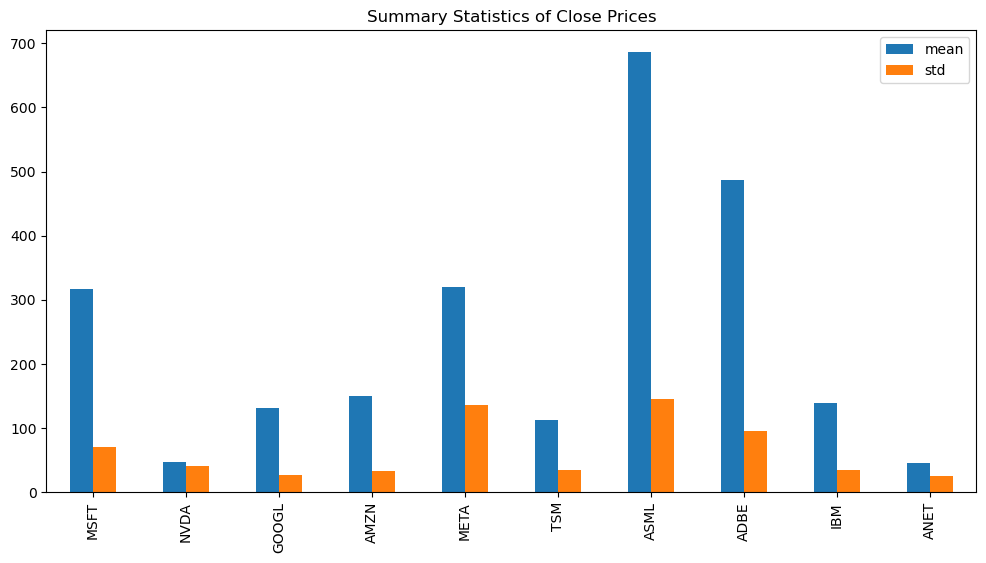

In [11]:
import pandas as pd

summary_df = pd.DataFrame()

for ticker in stocks_df:
    stats = stocks_df[ticker]['Close'].describe()
    summary_df[ticker] = stats  # Add statistics as a column for each company

summary_df = summary_df.T

#print(summary_df)
summary_df
#summary_df.to_csv("summary_statistics.csv")

summary_df.drop(columns=["count","max","25%","75%","50%","min"]).plot(kind='bar', figsize=(12, 6), title='Summary Statistics of Close Prices')


#### Histograms:

Histograms were used to visualize the distribution of "Close" prices, identifying the frequency of different price ranges.

<Axes: title={'center': 'Histogram of Prices'}, ylabel='Frequency'>

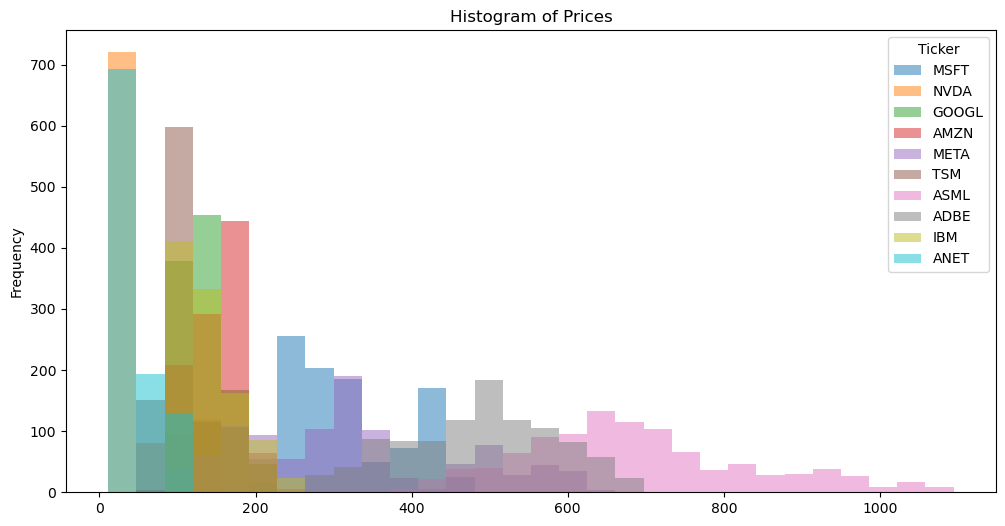

In [12]:
import matplotlib.pyplot as plt

# for ticker in data_df:
#     plt.figure(figsize=(10, 5))
#     plt.hist(data_df[ticker]['Close'], bins=30, alpha=0.7, color='blue')
#     plt.title(f"Histogram of {ticker} Close Prices")
#     plt.xlabel("Close Price")
#     plt.ylabel("Frequency")
#     plt.show()
# type(data_df) 
data_df.plot(kind='hist', bins=30, alpha=0.5,  figsize=(12, 6), title='Histogram of Prices')

#### Boxplots:

Boxplots were created to highlight the variability and detect potential outliers within the "Close" prices.

<Axes: title={'center': 'Boxplot of Prices'}>

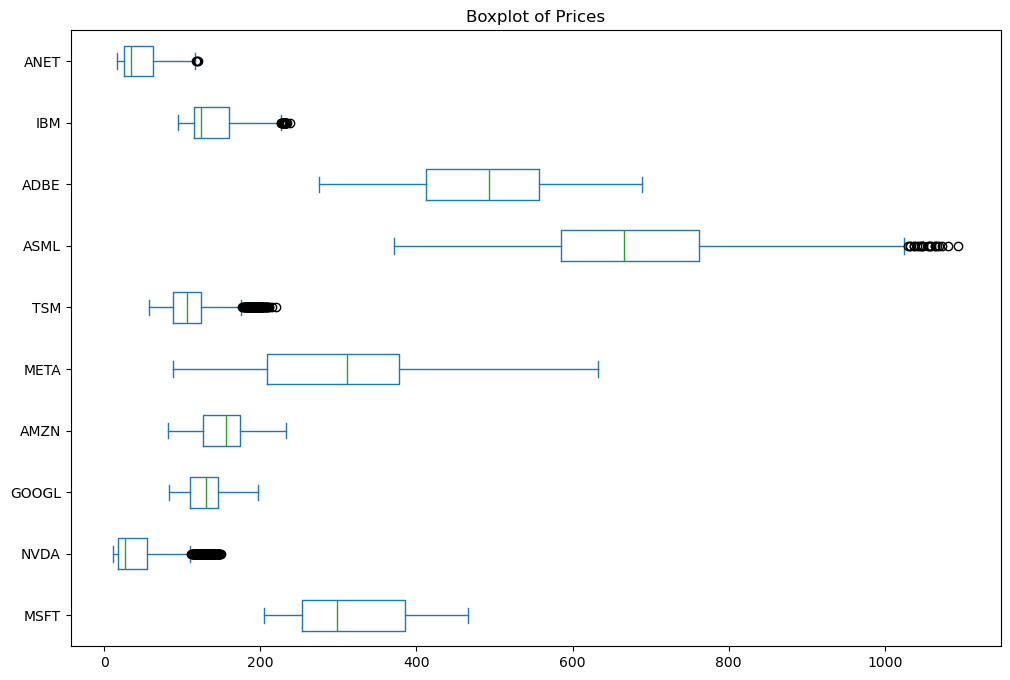

In [13]:
# for ticker in stocks_df:
#     plt.figure(figsize=(10, 5))
#     plt.boxplot(stocks_df[ticker]['Close'], vert=False)
#     plt.title(f"Boxplot of {ticker} Close Prices")
#     plt.xlabel("Close Price")
#     plt.show()

data_df.plot(kind='box', vert=False, figsize=(12, 8), title='Boxplot of Prices')

#### Time Series Plots:

Time series plots of "Close" prices were generated to observe trends, seasonality, and volatility over time.

<Axes: title={'center': 'Close Prices Over Time'}, xlabel='Date'>

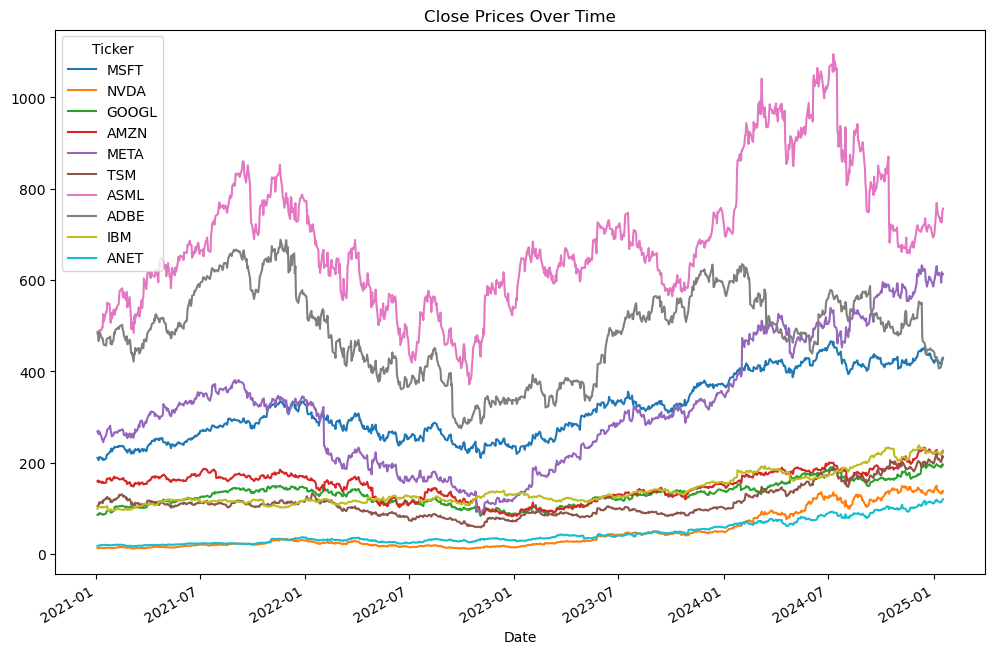

In [14]:
# for ticker in stocks_df:
#     plt.figure(figsize=(10, 5))
#     plt.plot(stocks_df[ticker].index, stocks_df[ticker]['Close'], label=f"{ticker} Close")
#     plt.title(f"{ticker} Close Price Over Time")
#     plt.xlabel("Date")
#     plt.ylabel("Close Price")
#     plt.legend()
#     plt.show()
    
data_df.plot(figsize=(12, 8), title='Close Prices Over Time')

#### Observations from Univariate Analysis

Trends : All companies show long-term upward trends, reflecting growth in the investment in the technology sector.

Volatility : Stocks like ASML show higher variability, indicating periods of significant market activity.


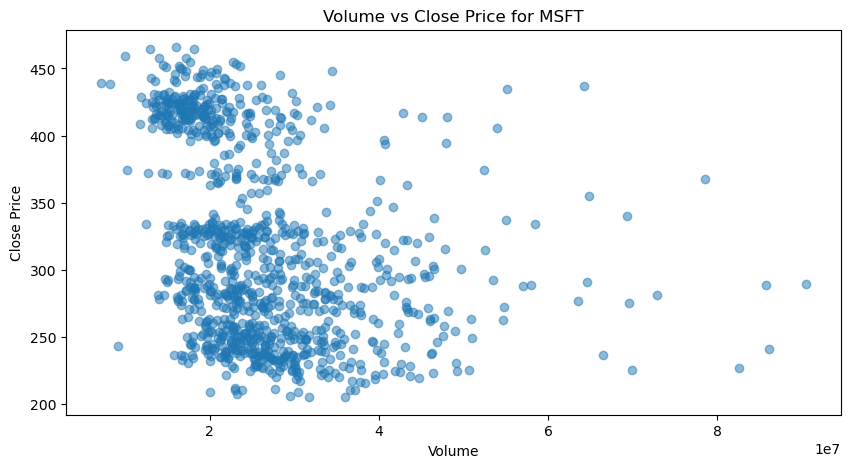

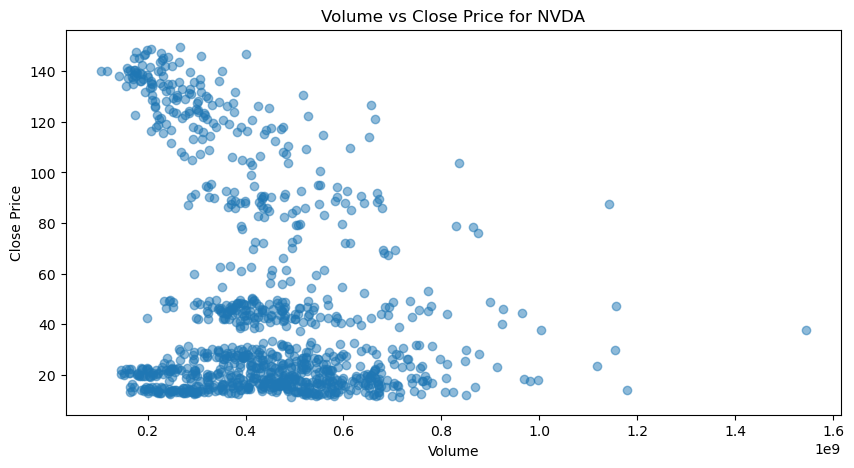

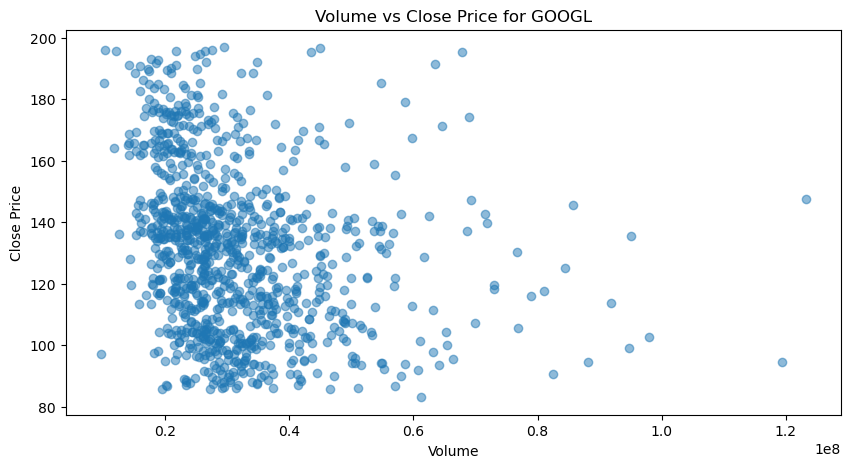

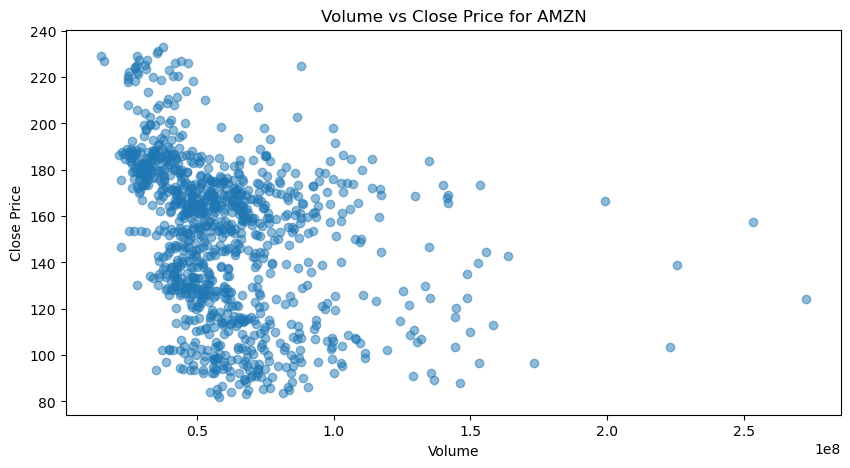

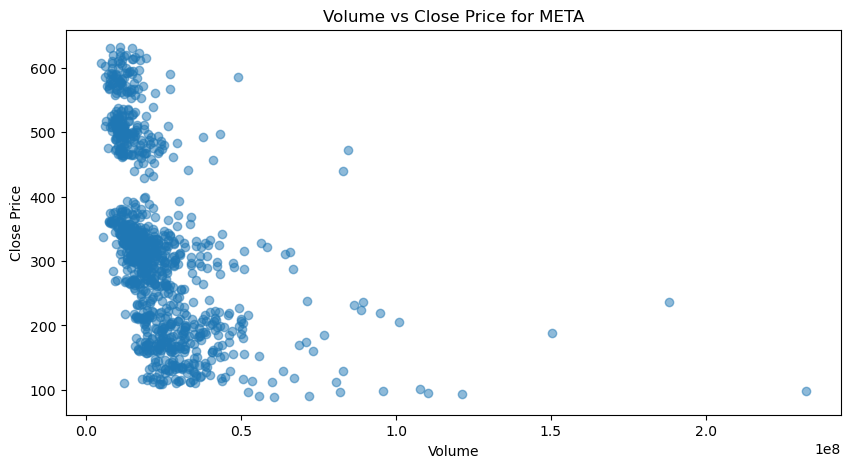

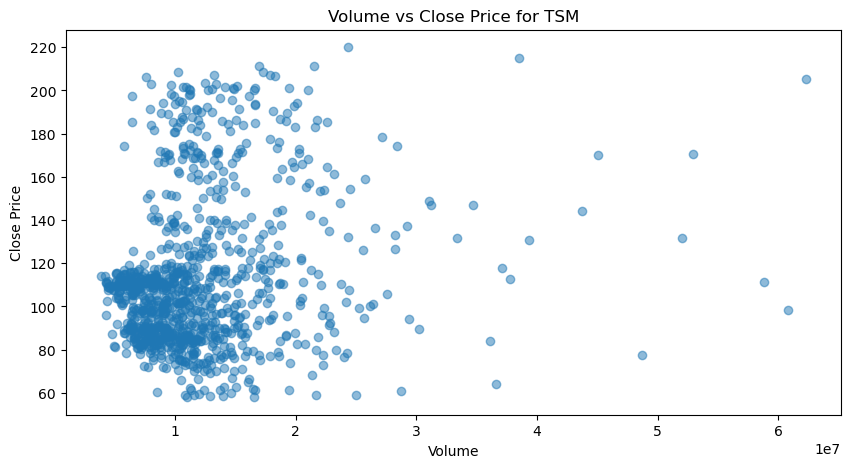

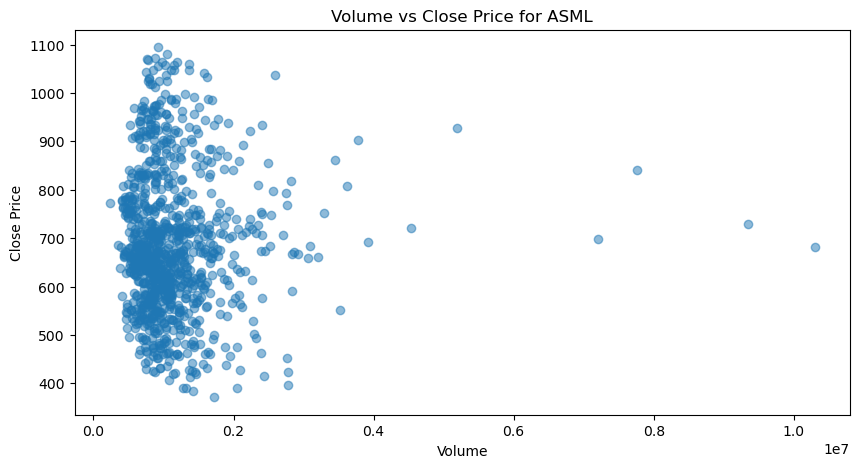

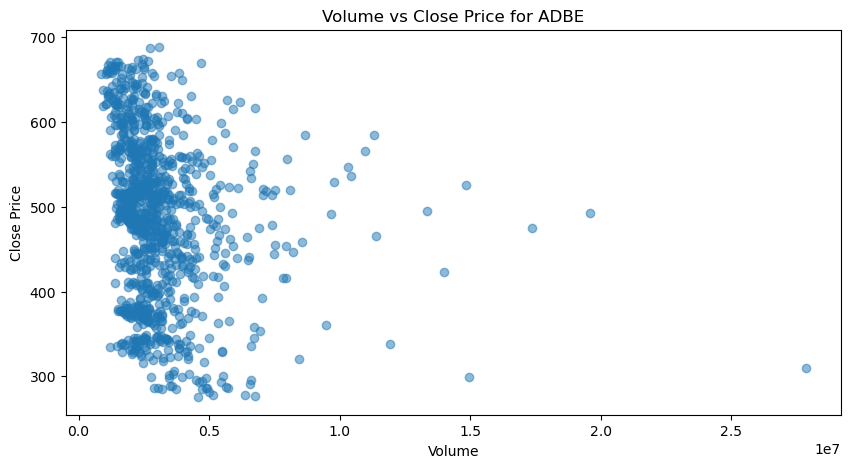

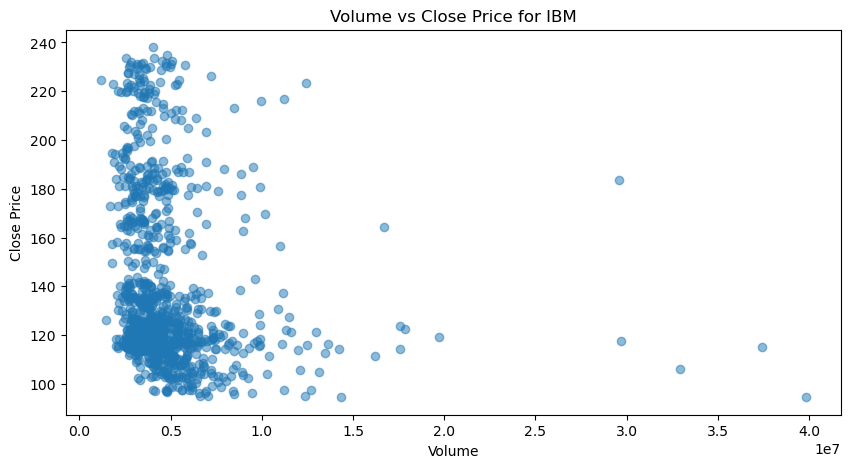

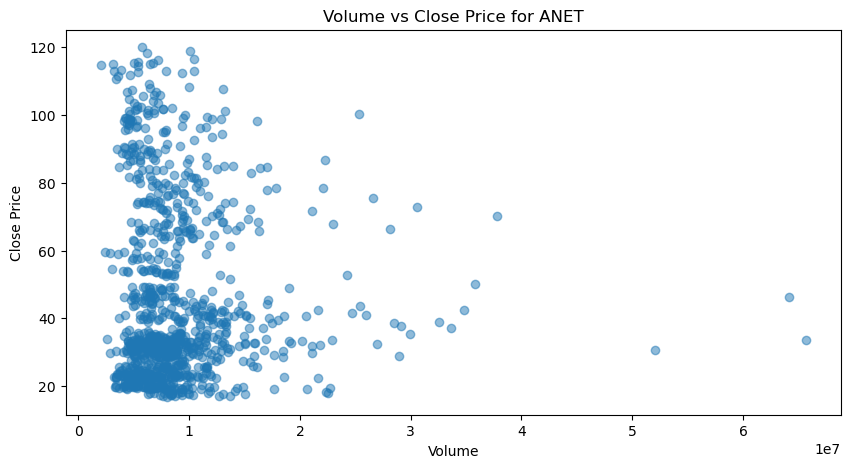

In [15]:
for ticker in stocks_df:
    plt.figure(figsize=(10, 5))
    plt.scatter(stocks_df[ticker]['Volume'], stocks_df[ticker]['Close'], alpha=0.5)
    plt.title(f"Volume vs Close Price for {ticker}")
    plt.xlabel("Volume")
    plt.ylabel("Close Price")
    plt.show()

#### Observations from Bivariate Analysis

Weak Correlations: Most stocks showed weak correlations between "Close" prices and trading volumes, suggesting the value of volume cannot predict closing prices.


## 5.3 Relevant Multivariate Analysis

To examine broader relationships among the "Close" prices of the selected companies, a multivariate analysis was conducted using correlation matrices and heatmaps.

#### Correlation Matrix:

A correlation matrix was generated to evaluate the relationships among "Close" prices of all companies

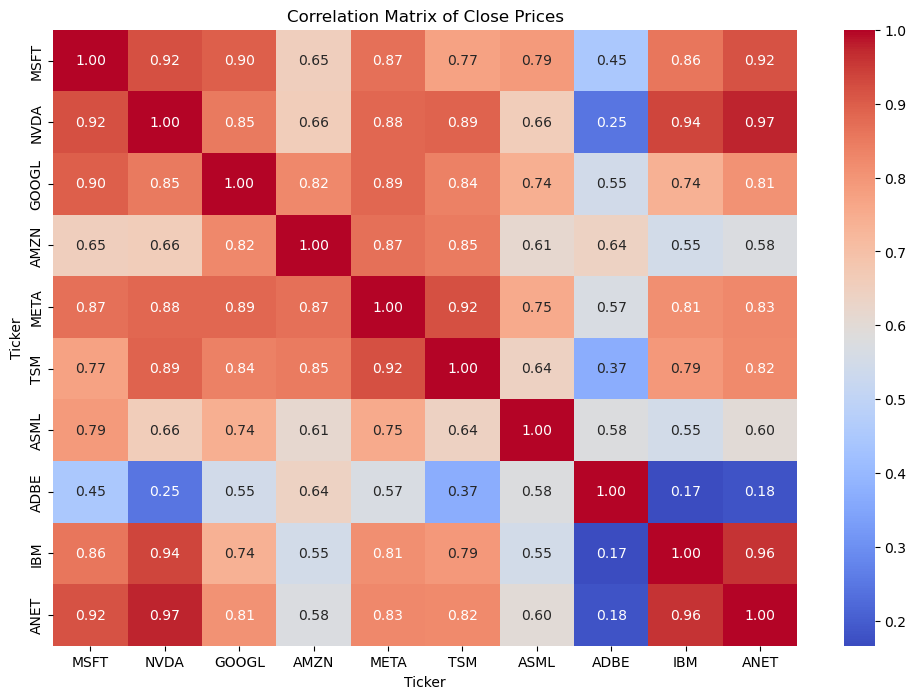

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Close Prices")
plt.show()

### Observations from Multivariate Analysis

Strong Correlations: Companies within similar sectors, such as MSFT and GOOGL, exhibit higher correlations in their "Close" prices, reflecting possible shared market drivers.

Weak Correlations: Companies like IBM and ADBE showed weaker correlations, possibly due to differences in their business models or market conditions.

# Chapter 6: Analysis

## 6.1 Model Descriptions

### ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a traditional statistical method for time series forecasting. It combines three components: autoregression (AR), integration (I), and moving average (MA). ARIMA is effective for modeling stationary data and has been a baseline for time series analysis for decades (Siami-Namini et al., 2019). Despite its simplicity, ARIMA struggles with non-linear and non-stationary datasets, making it less suitable for complex financial markets.

### LSTM (Long Short-Term Memory)

LSTM is a type of recurrent neural network (RNN) specifically designed to handle sequential data by capturing long-term dependencies. It employs gates to regulate the flow of information, addressing vanishing gradient problems in traditional RNNs. LSTM models excel at processing complex, high-dimensional time series data, such as stock prices (Chen et al., 2024).

### BiLSTM (Bidirectional Long Short-Term Memory)

BiLSTM enhances traditional LSTM by processing data in both forward and backward directions, improving the model's contextual understanding. This bidirectional approach is particularly useful for financial time series data, as it captures intricate patterns influenced by past and future contexts (Siami-Namini et al., 2019).

### Prophet

Prophet, developed by Facebook, is a user-friendly forecasting tool that decomposes time series into trend, seasonality, and holiday effects. It is particularly effective for datasets with strong seasonal patterns and outliers. Prophet's interpretability and ease of use make it a popular choice for business applications (Taylor and Letham, 2018).

### N-BEATS

N-BEATS is a deep learning architecture designed for univariate time series forecasting. It uses fully connected layers and residual connections to model trends and seasonality, achieving state-of-the-art performance on benchmark datasets (Oreshkin et al., 2019). The model's interpretability and scalability make it a powerful tool for financial forecasting.

### DeepAR

DeepAR, developed by Amazon, is a probabilistic forecasting model based on RNNs. It generates confidence intervals for predictions, making it suitable for risk assessment and decision-making in volatile markets. DeepAR is particularly effective for large-scale time series datasets (Salinas et al., 2020).

### Temporal Convolutional Networks (TCN)

TCNs are convolutional architectures designed for sequential data. They use causal and dilated convolutions to capture long-term dependencies efficiently. TCNs train faster and are more stable than RNN-based models, making them ideal for financial forecasting (Chen et al., 2024).

## 6.2 Data Preparation and Process

### Data Splitting

The dataset was split into training (80%) and testing (20%) sets to evaluate model performance. Temporal integrity was preserved by avoiding random shuffling, ensuring that the training set contains earlier data while the testing set contains subsequent data. This method aligns with time series forecasting best practices (Lawi et al., 2022).

### Feature Scaling

To enhance model performance, the "Close" prices were normalized using Min-Max scaling. This step ensures that models, particularly those based on neural networks, can process data efficiently and converge faster during training (Siami-Namini et al., 2019).

## 6.3 Evaluation Metrics

To evaluate model performance, multiple metrics were employed:

#### Mean Absolute Error (MAE): 
Measures the average magnitude of prediction errors without considering their direction. MAE is easy to interpret but less sensitive to large errors (Oreshkin et al., 2019).

#### Root Mean Squared Error (RMSE): 
Provides a more sensitive measure of errors by penalizing large deviations. RMSE is particularly useful for evaluating models where large errors are costly (Chen et al., 2024).

#### Mean Absolute Percentage Error (MAPE): 
Quantifies the accuracy of predictions as a percentage of actual values, making it useful for comparing performance across datasets (Salinas et al., 2020).

#### R-Squared (R²): 
Indicates the proportion of variance explained by the model, providing a measure of goodness-of-fit (Siami-Namini et al., 2019).



# 6.4 ARIMA

## ARIMA Evaluate Tests
#### Ljung-Box Test

The Ljung-Box test checks if residuals from the ARIMA model are uncorrelated, ensuring that no significant autocorrelation exists. This is essential for validating the assumption that the residuals are white noise.

#### ARCH-LM Test

The ARCH-LM test assesses the presence of heteroscedasticity (changing variance) in residuals, a common feature in financial time series data.

Null Hypothesis: There is no heteroscedasticity in the residuals (variance is constant).

Alternative Hypothesis: There is heteroscedasticity in the residuals (variance changes over time).

#### Shapiro-Wilk Test

The Shapiro-Wilk test evaluates whether residuals follow a normal distribution, a key assumption for statistical time series models. Deviations from normality could indicate potential model misspecification.

%%time
import warnings
warnings.filterwarnings('ignore')
from arch import arch_model 

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.graphics.tsaplots import plot_acf

# Split data into training and testing
train_size = int(len(data_df) * 0.8)
train, test = data_df[:train_size], data_df[train_size:]

for tick in tickers:
    # Auto ARIMA model
    model = pm.auto_arima(train[tick], seasonal=False, stepwise=True, suppress_warnings=True)
    forecast = model.predict(len(test))
    
    # ARIMA evaluation metrics
    arima_mae = mean_absolute_error(test[tick], forecast)
    arima_rmse = np.sqrt(mean_squared_error(test[tick], forecast))
    arima_mape = mean_absolute_percentage_error(test[tick], forecast)
    arima_r2 = r2_score(test[tick], forecast)
    
    
    print(f"{tick} - ARIMA Model Summary:")
    
    print(f"{tick} - Mean Absolute Error: {arima_mae}")
    print(f"{tick} - Root Mean Squared Error: {arima_rmse}")
    print(f"{tick} - Mean Absolute Percentage Error: {arima_mape}")
    print(f"{tick} - R2 Score: {arima_r2}")
    
    # Extract ARIMA order
    p, d, q = model.order
    arima_model = ARIMA(data_df[tick], order=(p, d, q)).fit()
    resids = arima_model.resid[1:]  # Skip the first residual
    
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(resids)
    plt.title(f"Residuals of ARIMA Model for {tick}")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.show()

    # Diagnostic tests
    ljung = acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"{tick} Ljung-Box test: {ljung['lb_pvalue'].values[0]}")
    
    test_stat, arch_p_value, _, _ = het_arch(resids)
    print(f"{tick} ARCH-LM Test p-value: {arch_p_value}")

    stat, shapiro_p = shapiro(resids)
    print(f"{tick} Shapiro-Wilk Test p-value: {shapiro_p}")
    
    sm.qqplot(resids, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()
    
    
    if arch_p_value < 0.05:
        print(f"{tick}: Significant heteroscedasticity detected. Fitting GARCH model.")
        
        
        garch_model = arch_model(resids, vol='Garch', p=1, q=1)
        garch_fit = garch_model.fit()
        print(garch_fit.summary())
        
        
        garch_residuals = garch_fit.std_resid  # Standardized residuals

        
        test_stat, arch_p_value, _, _ = het_arch(garch_residuals)
        print(f"ARCH-LM Test p-value (GARCH residuals): {arch_p_value}")
        if arch_p_value < 0.05:
            print("Significant heteroscedasticity detected in GARCH residuals.")
        else:
            print("No significant heteroscedasticity detected in GARCH residuals.")
        
        
        
        
        # Plot GARCH conditional variance
        plt.figure(figsize=(10, 6))
        plt.plot(garch_fit.conditional_volatility)
        plt.title(f"GARCH Conditional Volatility for {tick}")
        plt.xlabel("Time")
        plt.ylabel("Volatility")
        plt.show()
    
    # Forecast visualization
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[tick], label='Training Data')
    plt.plot(test.index, test[tick], label='Actual Prices')
    plt.plot(test.index, forecast, label='Forecasted Prices', linestyle='-')
    plt.title(f"ARIMA Model - {tick} Stock Price Forecasting")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()




MSFT - ARIMA Model Summary:
MSFT - Mean Absolute Error: 0.08157673387227866
MSFT - Root Mean Squared Error: 0.09566829657916341
MSFT - Mean Absolute Percentage Error: 0.013504745557570622
MSFT - R2 Score: -6.224284463463925


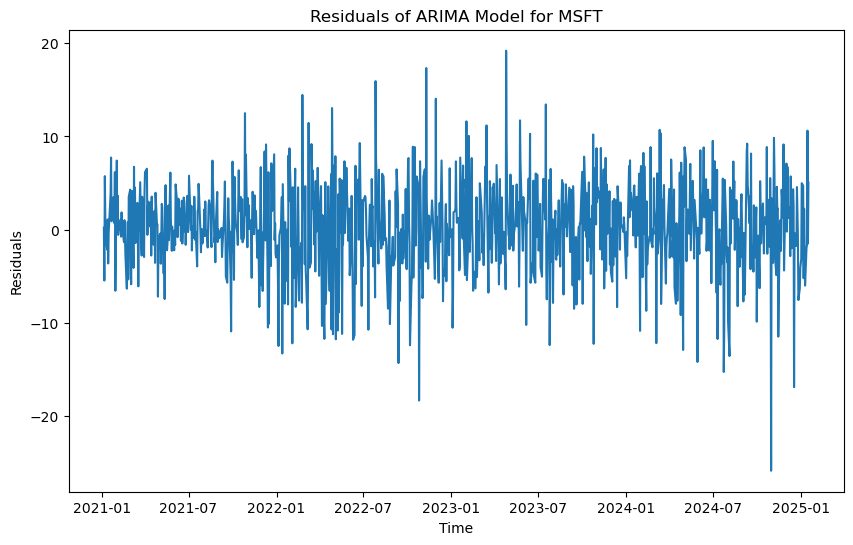

MSFT Ljung-Box test: 0.9787156879394469
MSFT ARCH-LM Test p-value: 0.642358673674328
MSFT Shapiro-Wilk Test p-value: 1.1529962430868386e-08


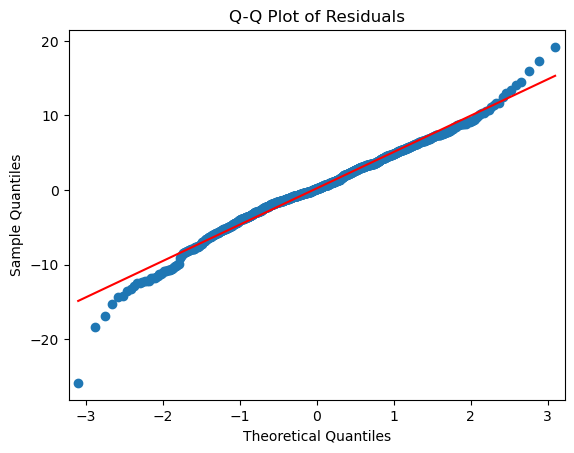

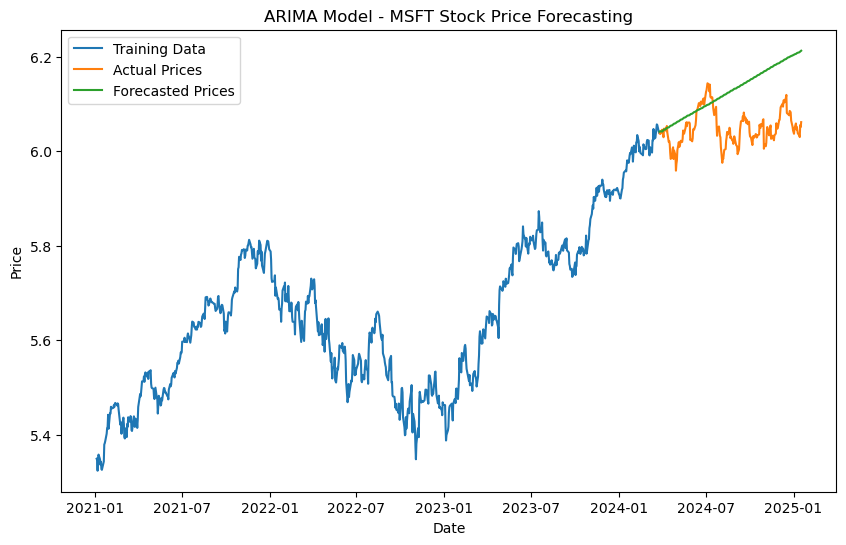

NVDA - ARIMA Model Summary:
NVDA - Mean Absolute Error: 0.0817361698969447
NVDA - Root Mean Squared Error: 0.09683188317958227
NVDA - Mean Absolute Percentage Error: 0.01725907803582961
NVDA - R2 Score: 0.6811854228462043


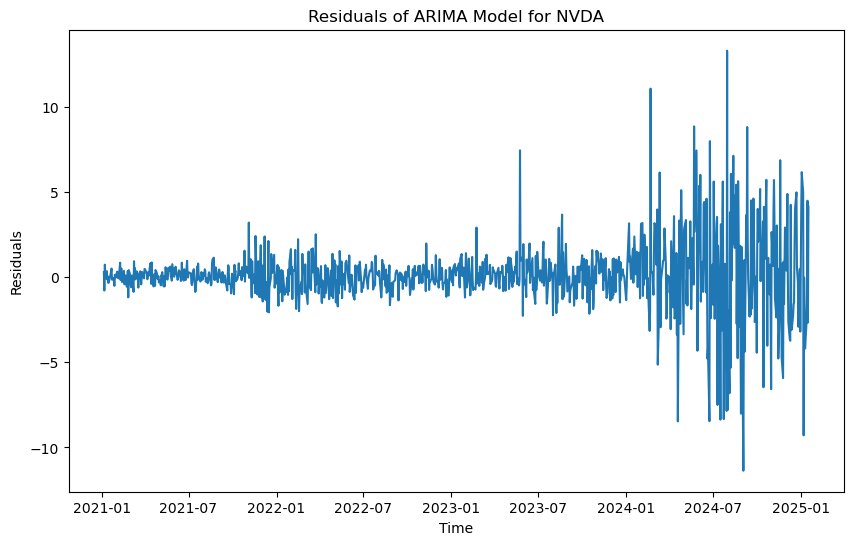

NVDA Ljung-Box test: 0.00010850354153772176
NVDA ARCH-LM Test p-value: 7.261808784640086e-38
NVDA Shapiro-Wilk Test p-value: 9.324406086973762e-32


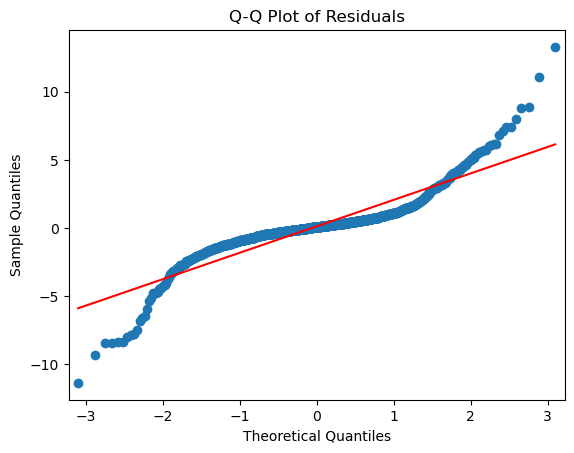

NVDA: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 19247.65658162516
Iteration:      2,   Func. Count:     14,   Neg. LLF: 126325.87109263494
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1599.8326121925893
Iteration:      4,   Func. Count:     26,   Neg. LLF: 2584.243514746161
Iteration:      5,   Func. Count:     32,   Neg. LLF: 6166.492058797332
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1902.4203460370586
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1572.8569128678325
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1572.2567442840646
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1572.141516347549
Iteration:     10,   Func. Count:     60,   Neg. LLF: 1572.1129882308092
Iteration:     11,   Func. Count:     65,   Neg. LLF: 1572.1051647382333
Iteration:     12,   Func. Count:     70,   Neg. LLF: 1572.103449141534
Iteration:     13,   Func. Count:     75,   Neg. LLF: 1572.10

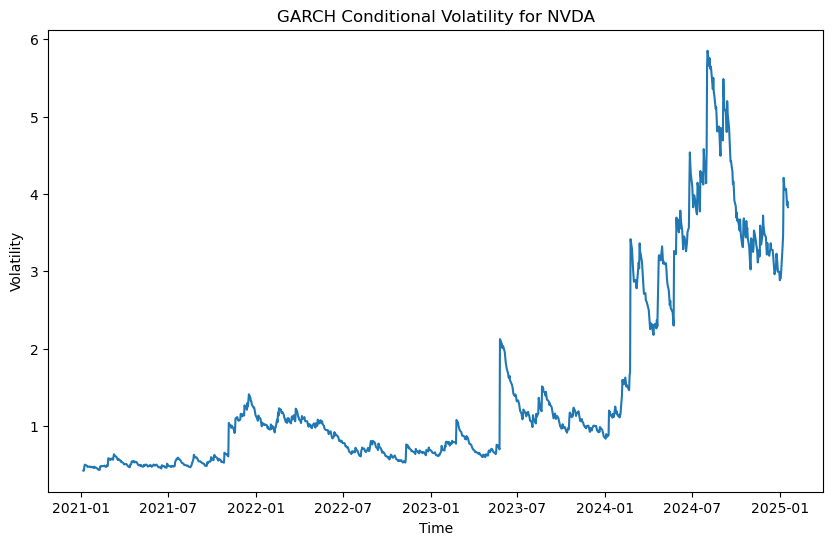

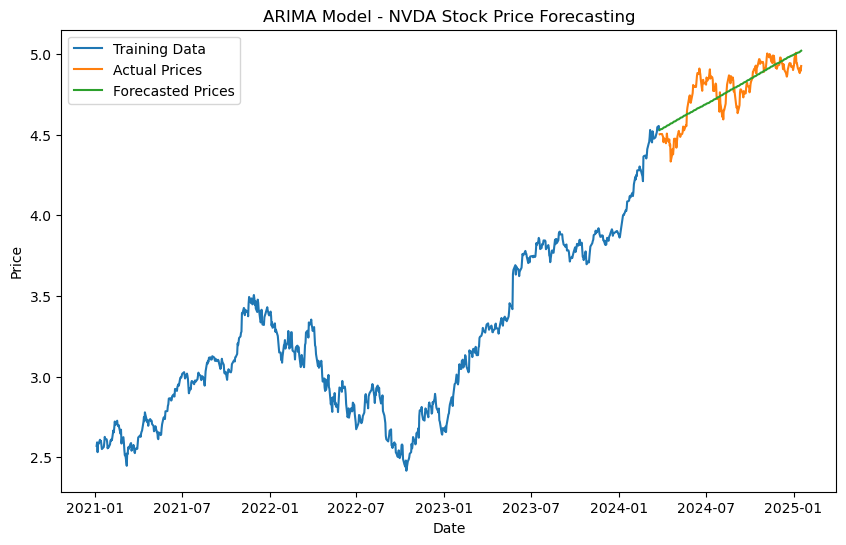

GOOGL - ARIMA Model Summary:
GOOGL - Mean Absolute Error: 0.12872588989175915
GOOGL - Root Mean Squared Error: 0.1462555862045403
GOOGL - Mean Absolute Percentage Error: 0.024865812809536075
GOOGL - R2 Score: -3.3859436666924916


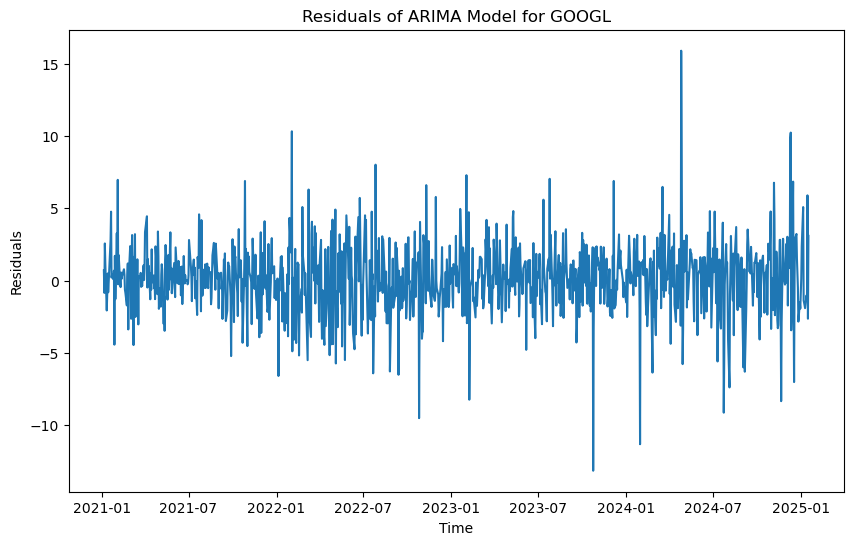

GOOGL Ljung-Box test: 0.3429884801190844
GOOGL ARCH-LM Test p-value: 0.37163498483354107
GOOGL Shapiro-Wilk Test p-value: 8.457110574388342e-16


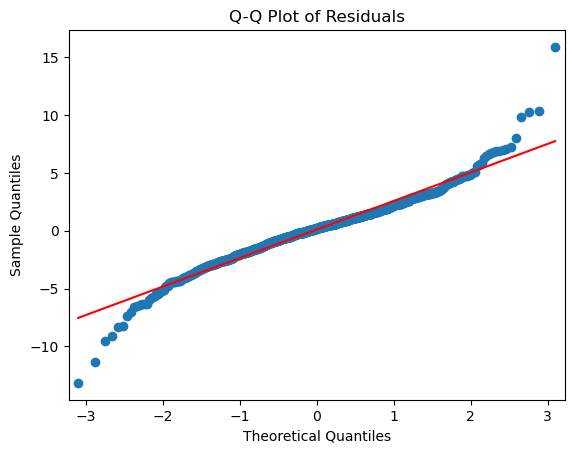

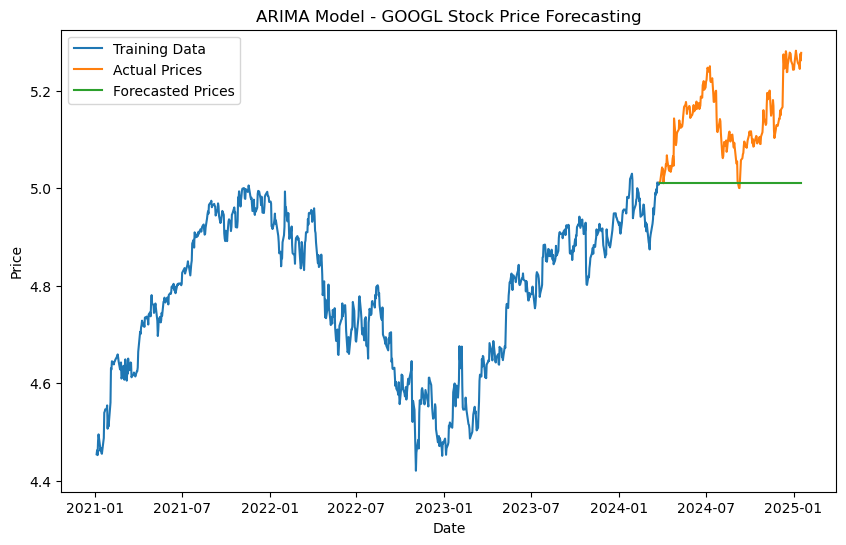

AMZN - ARIMA Model Summary:
AMZN - Mean Absolute Error: 0.07967019970335272
AMZN - Root Mean Squared Error: 0.1085361588014445
AMZN - Mean Absolute Percentage Error: 0.014968675228182049
AMZN - R2 Score: -0.7101501296479402


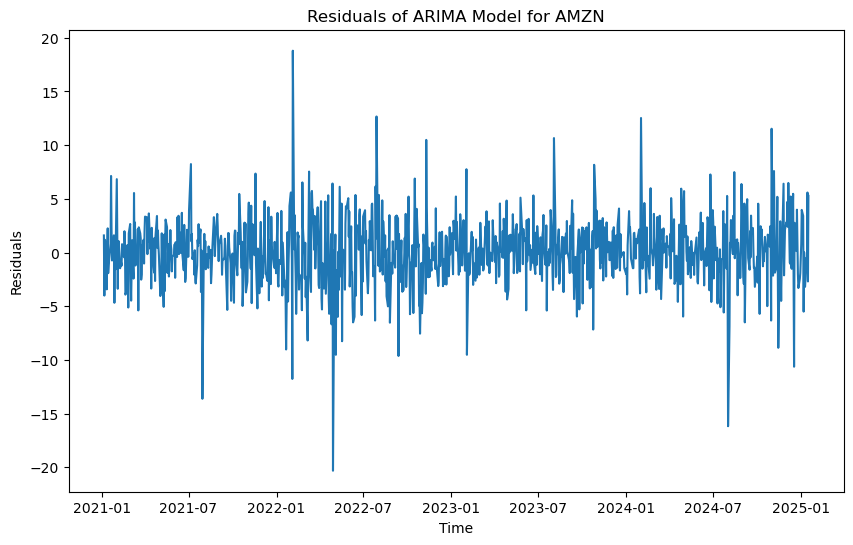

AMZN Ljung-Box test: 0.4899316372259611
AMZN ARCH-LM Test p-value: 0.026339312444833875
AMZN Shapiro-Wilk Test p-value: 3.1029652921575794e-16


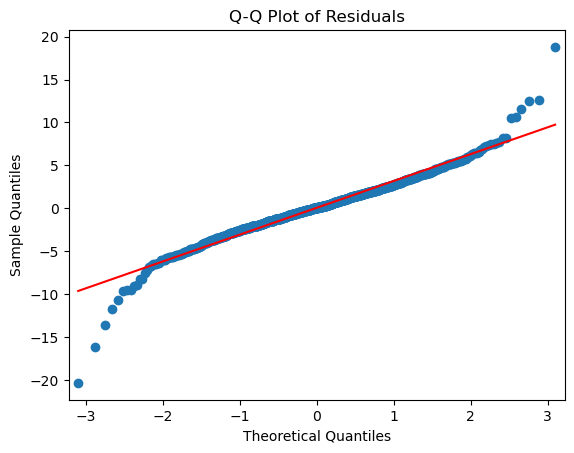

AMZN: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3961.06014869541
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3347.504780271035
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2729.4700517987994
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2588.5597027143995
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2564.8662466266587
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2564.839337568721
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2564.8389661924284
Iteration:      8,   Func. Count:     49,   Neg. LLF: 2564.838955551186
Iteration:      9,   Func. Count:     54,   Neg. LLF: 2564.838952386667
Iteration:     10,   Func. Count:     58,   Neg. LLF: 2564.8389523866836
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2564.838952386667
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10

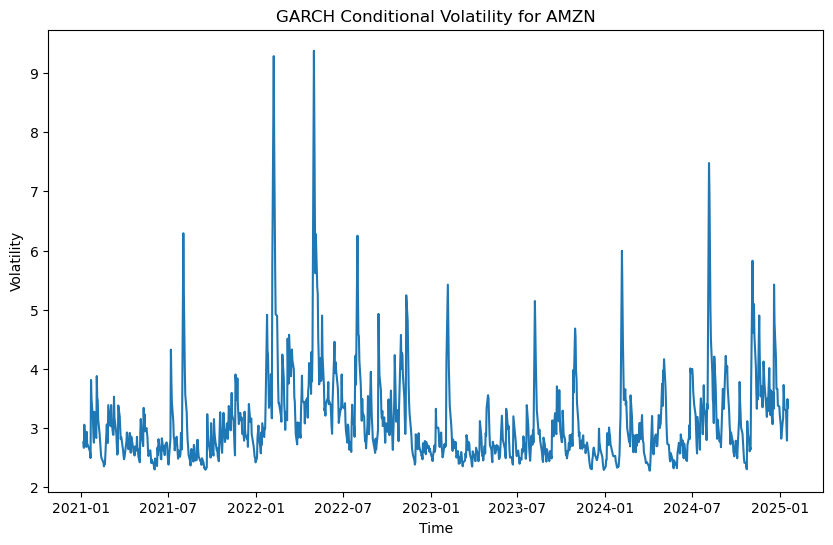

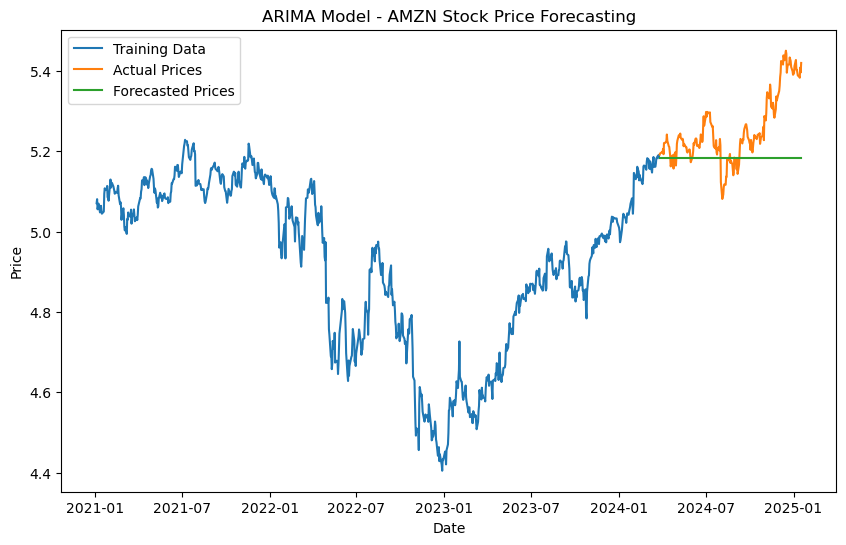

META - ARIMA Model Summary:
META - Mean Absolute Error: 0.09554827362681391
META - Root Mean Squared Error: 0.11906471934878632
META - Mean Absolute Percentage Error: 0.015093447944040822
META - R2 Score: -0.5198929253813085


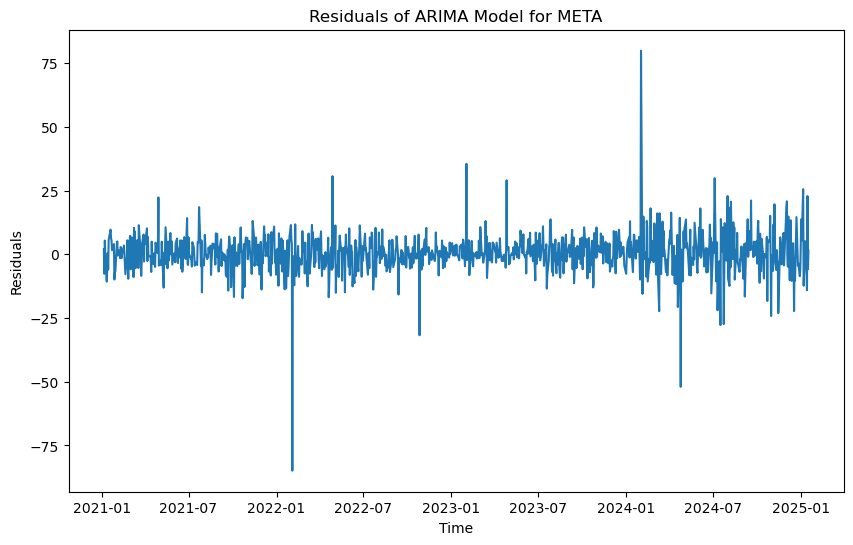

META Ljung-Box test: 0.48582860572882225
META ARCH-LM Test p-value: 0.9998271511353974
META Shapiro-Wilk Test p-value: 1.1617129953702886e-29


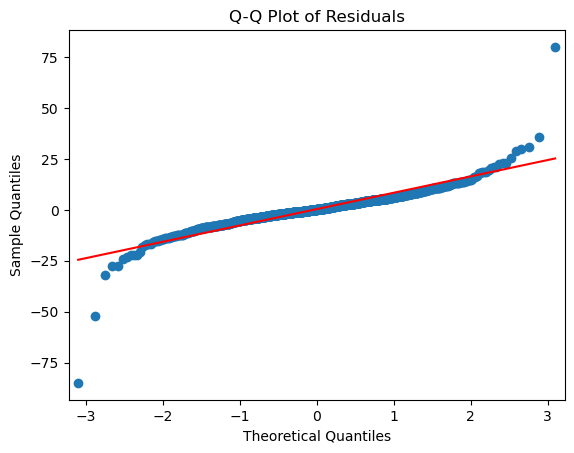

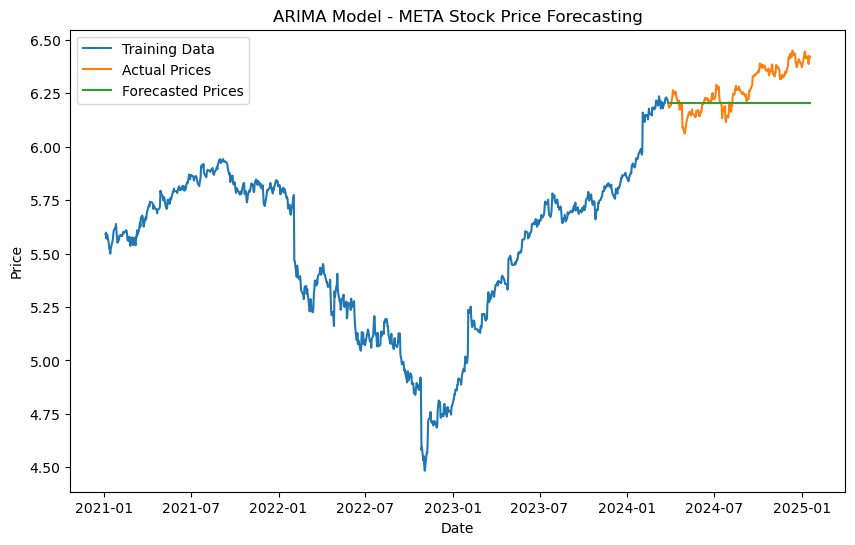

TSM - ARIMA Model Summary:
TSM - Mean Absolute Error: 0.22369620729544637
TSM - Root Mean Squared Error: 0.25527724851489564
TSM - Mean Absolute Percentage Error: 0.042919897991258844
TSM - R2 Score: -2.864101570761946


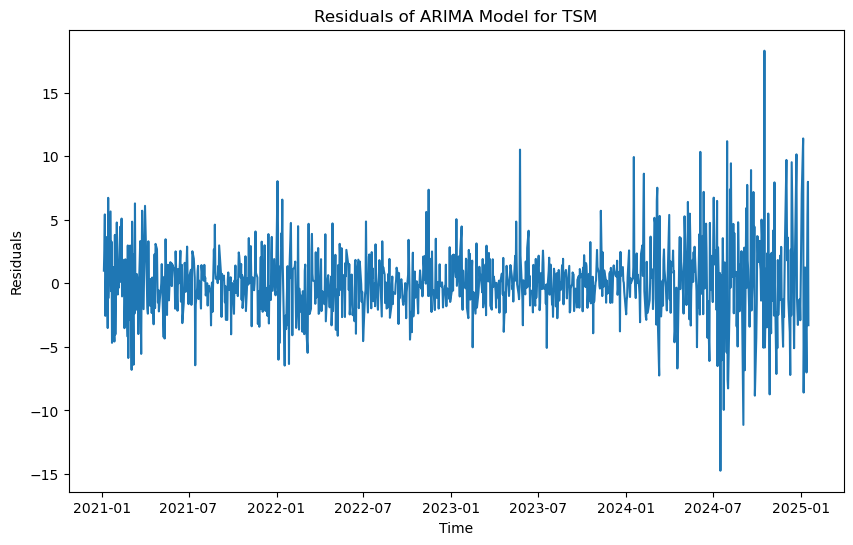

TSM Ljung-Box test: 0.013826647194272469
TSM ARCH-LM Test p-value: 1.252769816166287e-13
TSM Shapiro-Wilk Test p-value: 2.200978042908902e-18


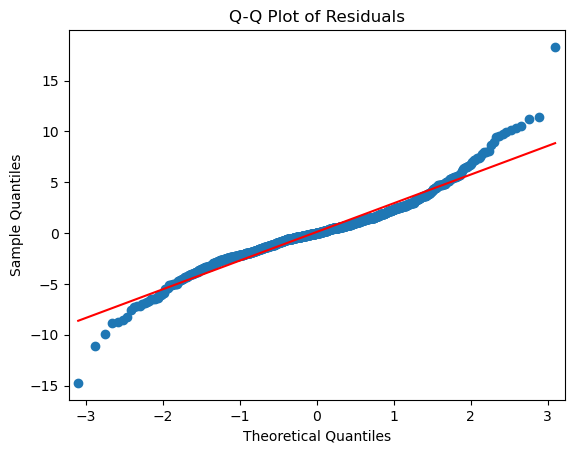

TSM: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 17470704450.39256
Iteration:      2,   Func. Count:     14,   Neg. LLF: 26841.122897977293
Iteration:      3,   Func. Count:     22,   Neg. LLF: 3847.6544953791354
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2376.193855958537
Iteration:      5,   Func. Count:     36,   Neg. LLF: 2375.610803666076
Iteration:      6,   Func. Count:     42,   Neg. LLF: 2370.0672205368746
Iteration:      7,   Func. Count:     48,   Neg. LLF: 2366.1291891488054
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2365.372738035238
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2365.087083492108
Iteration:     10,   Func. Count:     66,   Neg. LLF: 2365.0576697031024
Iteration:     11,   Func. Count:     71,   Neg. LLF: 2365.0576554475433
Iteration:     12,   Func. Count:     75,   Neg. LLF: 2365.0576554475283
Optimization terminated successfully    (Exit mode 0)
        

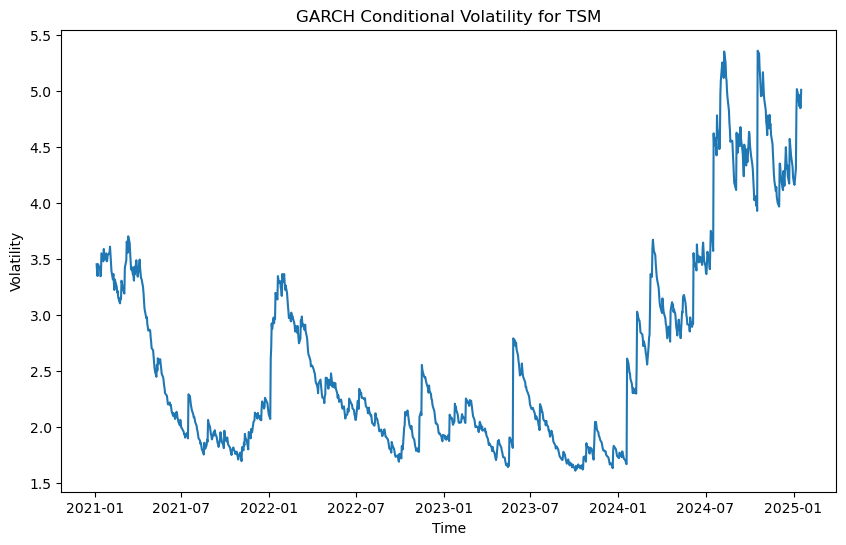

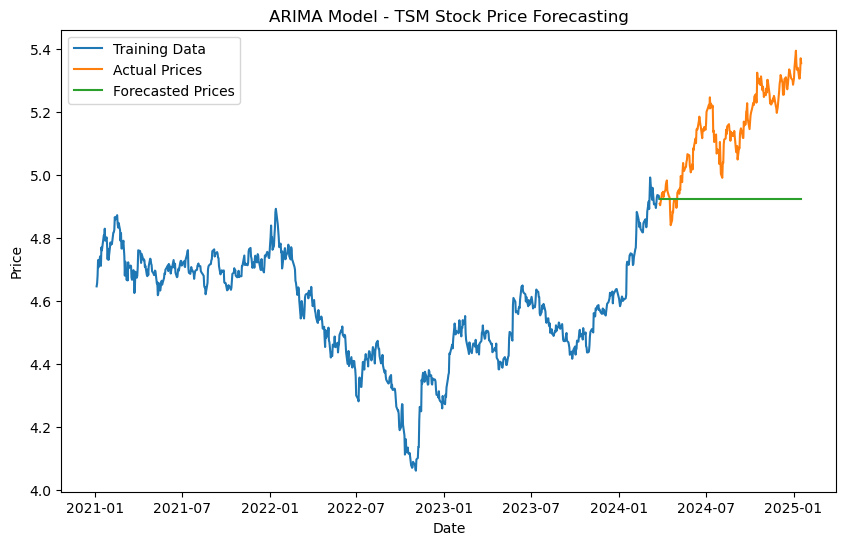

ASML - ARIMA Model Summary:
ASML - Mean Absolute Error: 0.16120355154683122
ASML - Root Mean Squared Error: 0.20036507661018263
ASML - Mean Absolute Percentage Error: 0.024305134952578848
ASML - R2 Score: -0.9072728533862089


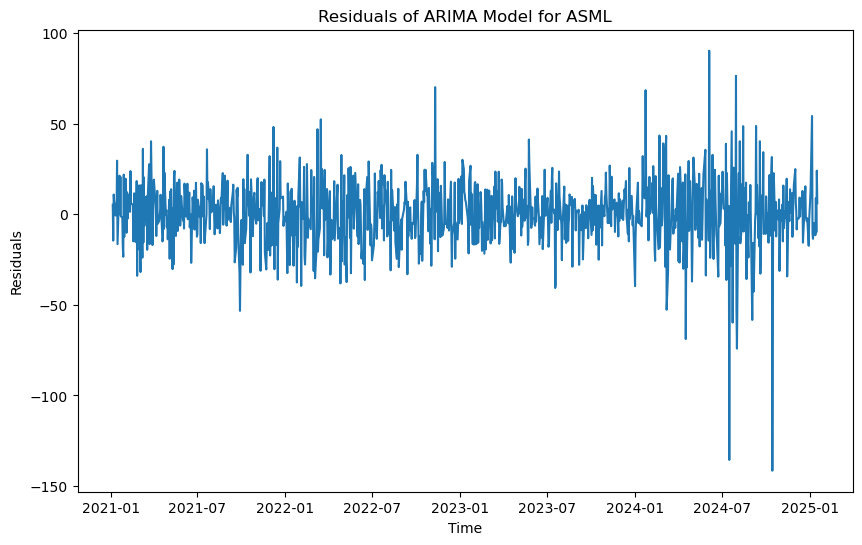

ASML Ljung-Box test: 0.5903489390202721
ASML ARCH-LM Test p-value: 0.0020365066171240836
ASML Shapiro-Wilk Test p-value: 9.880592082767355e-20


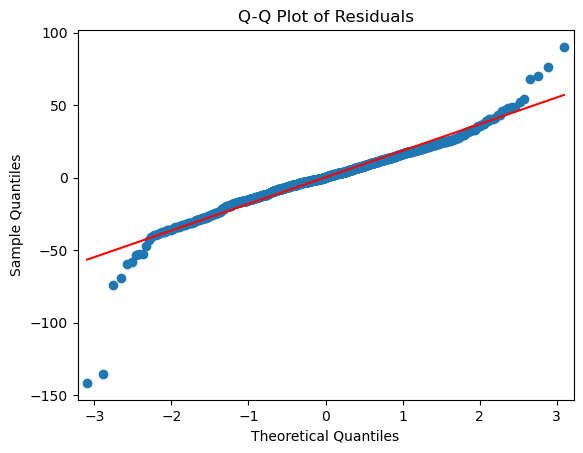

ASML: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5068.5736115409
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5955.072731581999
Iteration:      3,   Func. Count:     20,   Neg. LLF: 4437.5701797489
Iteration:      4,   Func. Count:     26,   Neg. LLF: 4349.633995515421
Iteration:      5,   Func. Count:     32,   Neg. LLF: 4345.9187656141075
Iteration:      6,   Func. Count:     38,   Neg. LLF: 4343.242235964696
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4341.312927820516
Iteration:      8,   Func. Count:     50,   Neg. LLF: 4341.336163467617
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4340.990169560774
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4340.989425656835
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4340.9894237693425
Iteration:     12,   Func. Count:     70,   Neg. LLF: 4340.989423771194
Optimization terminated successfully    (Exit mode 0)
            Curr

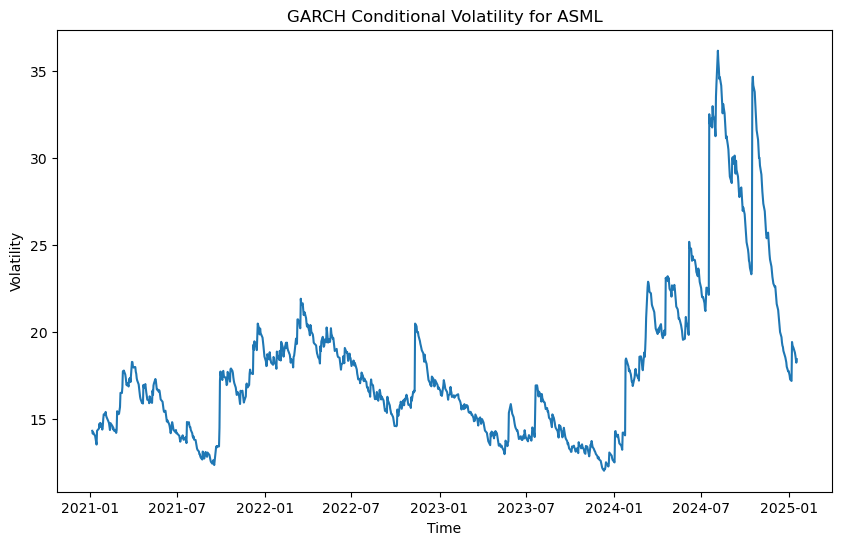

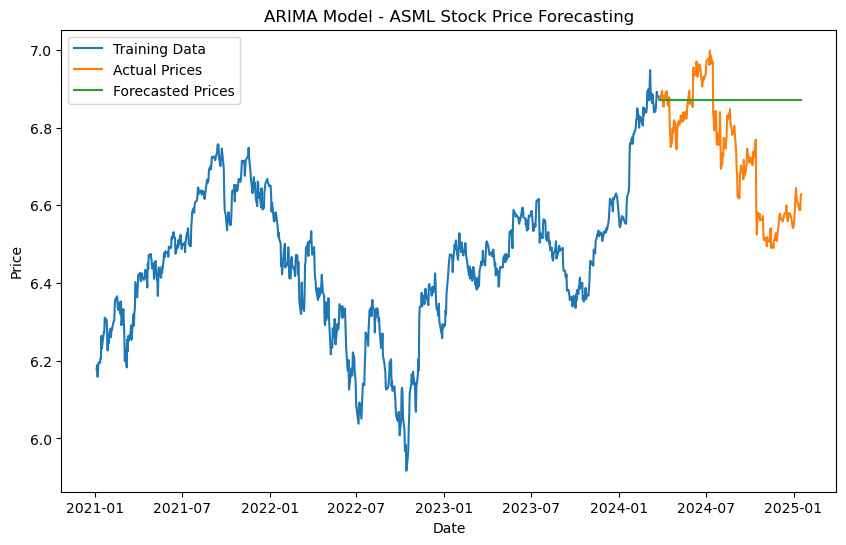

ADBE - ARIMA Model Summary:
ADBE - Mean Absolute Error: 0.068366842841084
ADBE - Root Mean Squared Error: 0.08314742198547403
ADBE - Mean Absolute Percentage Error: 0.011020656067818707
ADBE - R2 Score: -0.012375415246936416


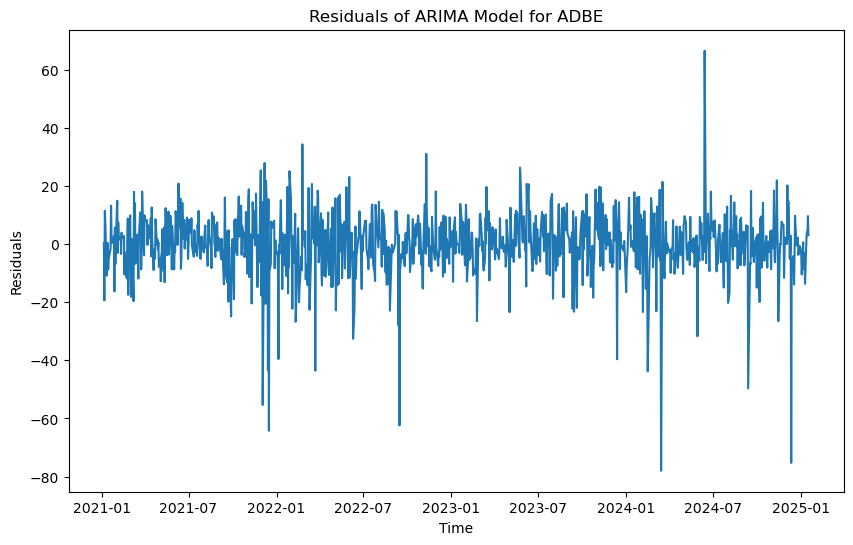

ADBE Ljung-Box test: 0.9352464763378258
ADBE ARCH-LM Test p-value: 0.5923311336695234
ADBE Shapiro-Wilk Test p-value: 1.9131395579776016e-25


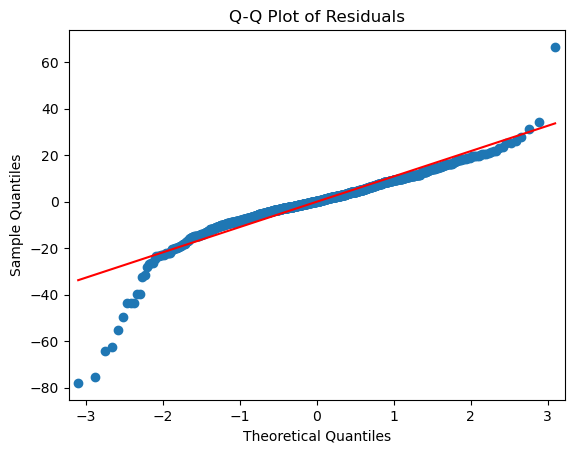

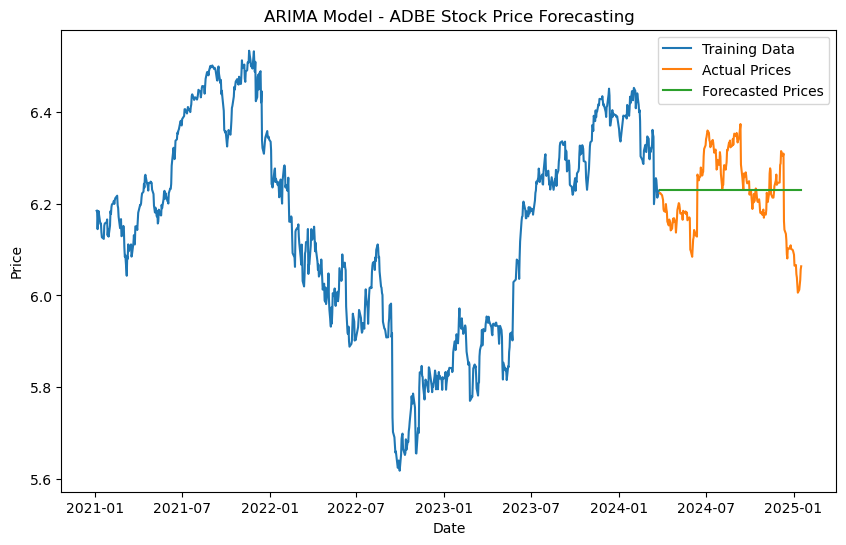

IBM - ARIMA Model Summary:
IBM - Mean Absolute Error: 0.07164359080672957
IBM - Root Mean Squared Error: 0.0855867435715325
IBM - Mean Absolute Percentage Error: 0.013668206249998876
IBM - R2 Score: 0.49974206295391377


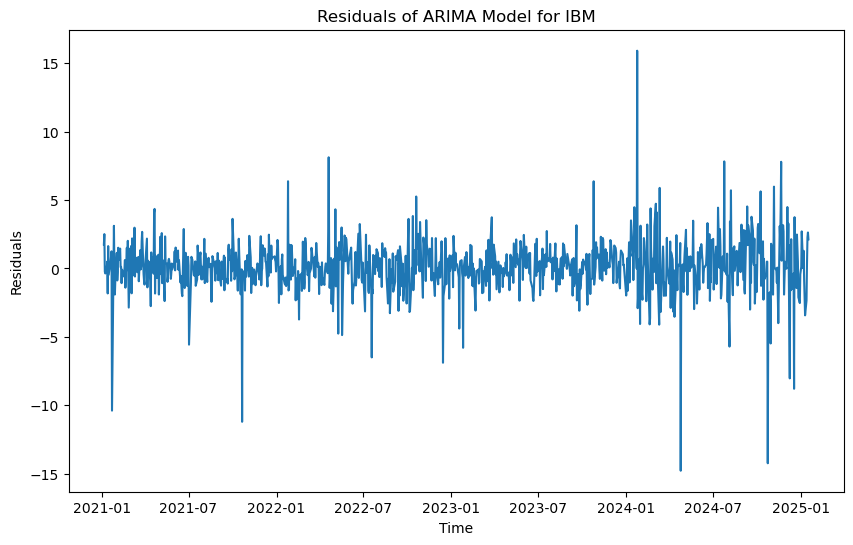

IBM Ljung-Box test: 0.7394008880321261
IBM ARCH-LM Test p-value: 0.7688334067900393
IBM Shapiro-Wilk Test p-value: 1.454763445823697e-27


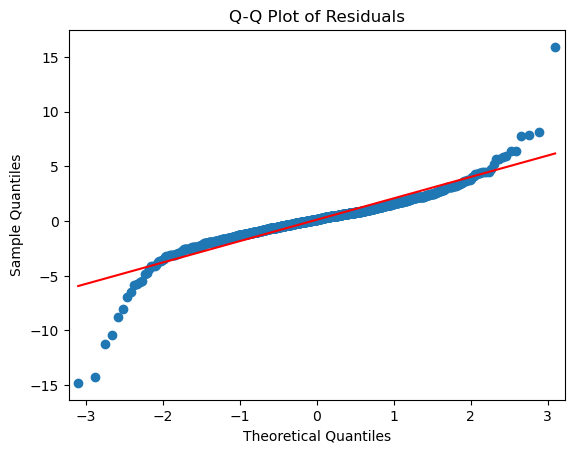

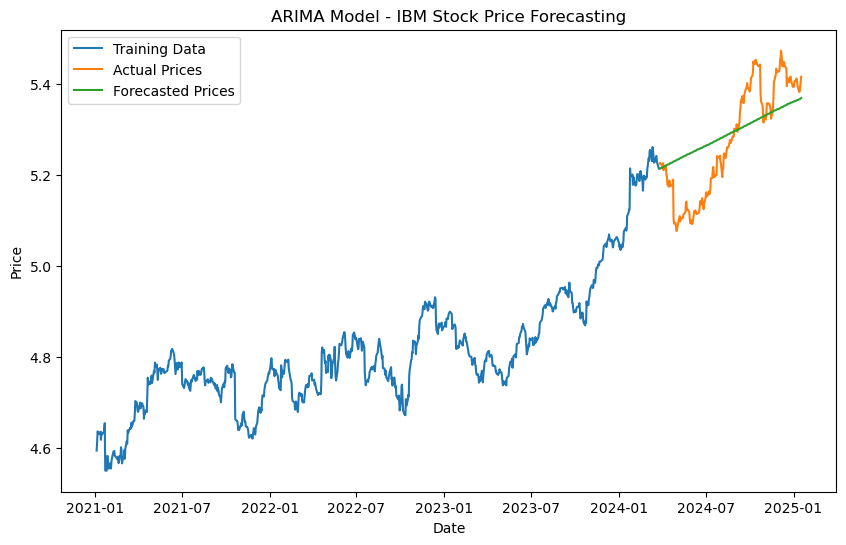

ANET - ARIMA Model Summary:
ANET - Mean Absolute Error: 0.05760749185422924
ANET - Root Mean Squared Error: 0.07470916574488352
ANET - Mean Absolute Percentage Error: 0.013019721251756202
ANET - R2 Score: 0.784587982714797


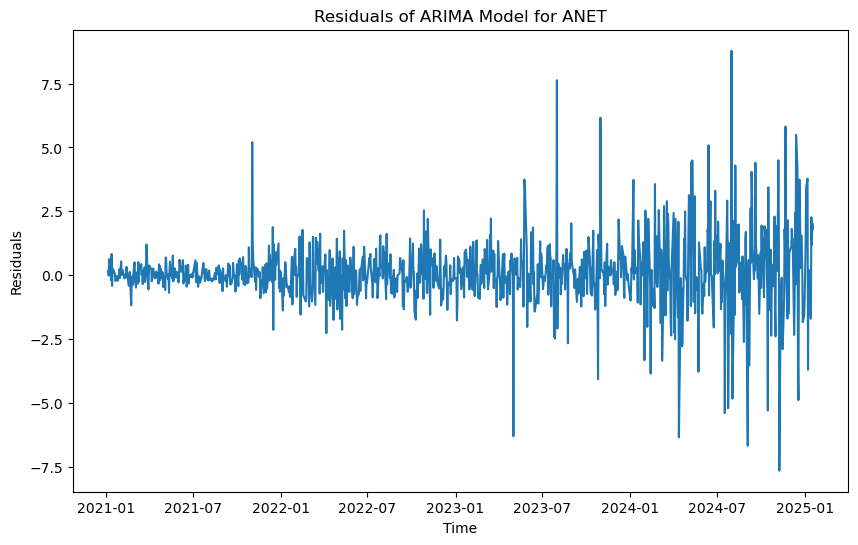

ANET Ljung-Box test: 0.016727084085794926
ANET ARCH-LM Test p-value: 9.158328016203876e-13
ANET Shapiro-Wilk Test p-value: 2.2323539996551003e-28


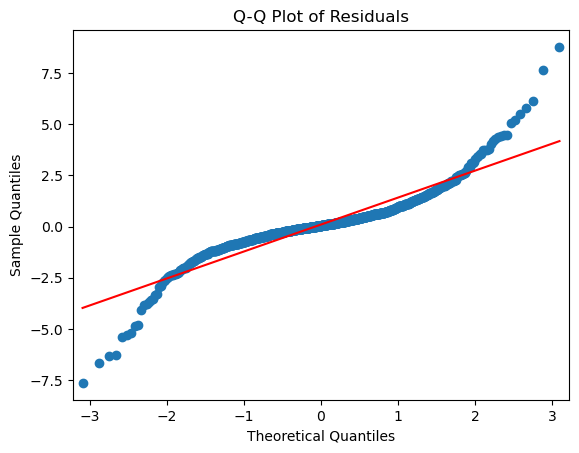

ANET: Significant heteroscedasticity detected. Fitting GARCH model.
Iteration:      1,   Func. Count:      6,   Neg. LLF: 27808.339747534304
Iteration:      2,   Func. Count:     14,   Neg. LLF: 150092.59996445331
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1508.2874942504181
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1507.6322658493425
Iteration:      5,   Func. Count:     33,   Neg. LLF: 7025.310333689142
Iteration:      6,   Func. Count:     39,   Neg. LLF: 8101.564466007067
Iteration:      7,   Func. Count:     46,   Neg. LLF: 7244.297528624899
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6789515.965350204
Iteration:      9,   Func. Count:     60,   Neg. LLF: 7030.75284817579
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1502.8256951880255
Iteration:     11,   Func. Count:     72,   Neg. LLF: 1468.521329243597
Iteration:     12,   Func. Count:     77,   Neg. LLF: 6290.149714091492
Iteration:     13,   Func. Count:     85,   Neg. LLF: 1555.41121

/opt/anaconda3/envs/proj/lib/python3.11/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


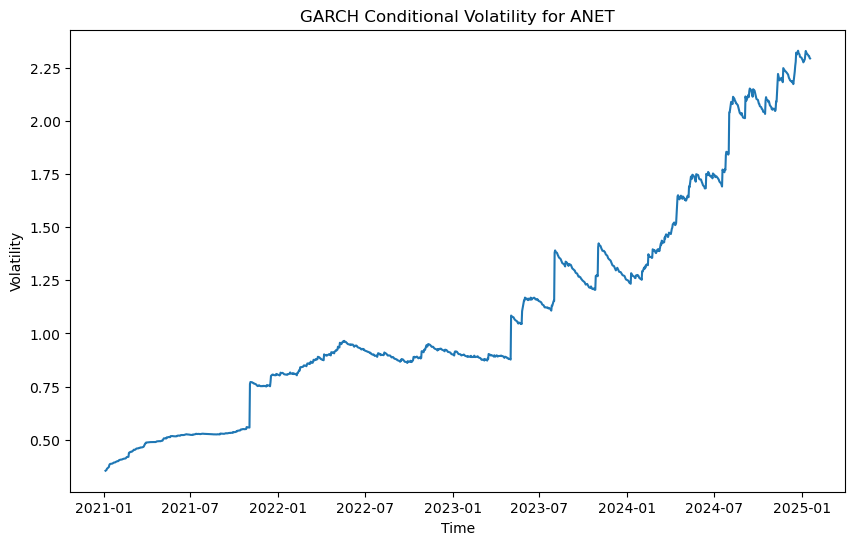

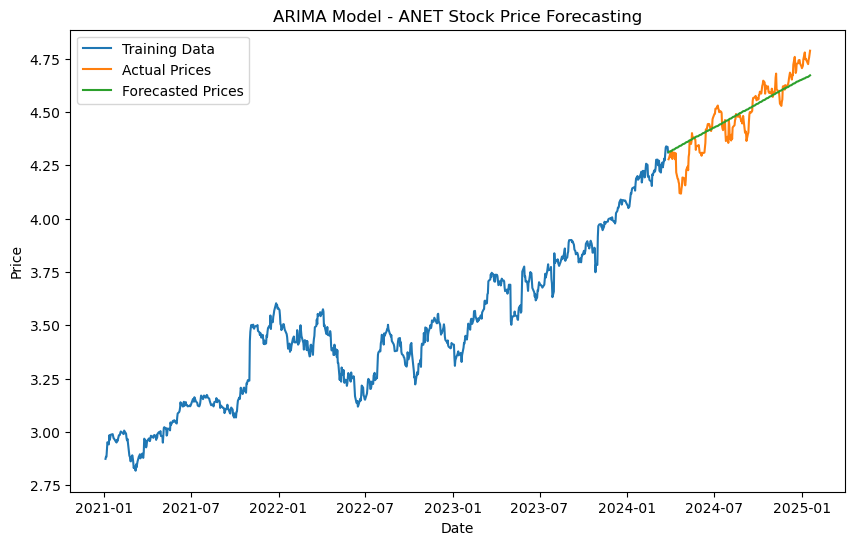

  Ticker ARIMA_Order       MAE      RMSE      MAPE        R2  Ljung-Box_p  \
0   MSFT   (2, 1, 2)  0.081577  0.095668  0.013505 -6.224284     0.978716   
1   NVDA   (0, 1, 0)  0.081736  0.096832  0.017259  0.681185     0.000109   
2  GOOGL   (0, 1, 0)  0.128726  0.146256  0.024866 -3.385944     0.342988   
3   AMZN   (0, 1, 0)  0.079670  0.108536  0.014969 -0.710150     0.489932   
4   META   (0, 1, 0)  0.095548  0.119065  0.015093 -0.519893     0.485829   
5    TSM   (0, 1, 0)  0.223696  0.255277  0.042920 -2.864102     0.013827   
6   ASML   (0, 1, 0)  0.161204  0.200365  0.024305 -0.907273     0.590349   
7   ADBE   (0, 1, 0)  0.068367  0.083147  0.011021 -0.012375     0.935246   
8    IBM   (0, 1, 0)  0.071644  0.085587  0.013668  0.499742     0.739401   
9   ANET   (0, 1, 0)  0.057607  0.074709  0.013020  0.784588     0.016727   

      ARCH-LM_p  Shapiro-Wilk_p  GARCH_Fit  GARCH_ARCH-LM_p  
0  6.423587e-01    1.152996e-08      False              NaN  
1  7.261809e-38    9.324406e

In [23]:
%%time
from arch import arch_model 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.graphics.tsaplots import plot_acf

loged_data = np.log(data_df)
results = []

train_size = int(len(loged_data) * 0.8)
train, test = loged_data[:train_size], loged_data[train_size:]


for tick in tickers:
    # Auto ARIMA model
    model = pm.auto_arima(train[tick], seasonal=False, stepwise=True, suppress_warnings=True)
    forecast = model.predict(len(test))
    
    # ARIMA evaluation metrics
    arima_mae = mean_absolute_error(test[tick], forecast)
    arima_rmse = np.sqrt(mean_squared_error(test[tick], forecast))
    arima_mape = mean_absolute_percentage_error(test[tick], forecast)
    arima_r2 = r2_score(test[tick], forecast)
    
    
    print(f"{tick} - ARIMA Model Summary:")
    
    print(f"{tick} - Mean Absolute Error: {arima_mae}")
    print(f"{tick} - Root Mean Squared Error: {arima_rmse}")
    print(f"{tick} - Mean Absolute Percentage Error: {arima_mape}")
    print(f"{tick} - R2 Score: {arima_r2}")
    
    # Extract ARIMA order
    p, d, q = model.order
    arima_model = ARIMA(data_df[tick], order=(p, d, q)).fit()
    resids = arima_model.resid[1:]  # Skip the first residual
    
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(resids)
    plt.title(f"Residuals of ARIMA Model for {tick}")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.show()

    # Diagnostic tests
    ljung = acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"{tick} Ljung-Box test: {ljung['lb_pvalue'].values[0]}")
    
    test_stat, arch_p_value, _, _ = het_arch(resids)
    print(f"{tick} ARCH-LM Test p-value: {arch_p_value}")

    stat, shapiro_p = shapiro(resids)
    print(f"{tick} Shapiro-Wilk Test p-value: {shapiro_p}")
    
    sm.qqplot(resids, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()
    
    result_dict = {
        "Ticker": tick,
        "ARIMA_Order": (p, d, q),
        "MAE": arima_mae,
        "RMSE": arima_rmse,
        "MAPE": arima_mape,
        "R2": arima_r2,
        "Ljung-Box_p": ljung['lb_pvalue'].values[0],
        "ARCH-LM_p": arch_p_value,
        "Shapiro-Wilk_p": shapiro_p
    }
    if arch_p_value < 0.05:
        print(f"{tick}: Significant heteroscedasticity detected. Fitting GARCH model.")
        
        
        garch_model = arch_model(resids, vol='Garch', p=1, q=1)
        garch_fit = garch_model.fit()
        print(garch_fit.summary())
        
        
        garch_residuals = garch_fit.std_resid  # Standardized residuals

        
        test_stat, arch_p_value, _, _ = het_arch(garch_residuals)
        print(f"ARCH-LM Test p-value (GARCH residuals): {arch_p_value}")
        if arch_p_value < 0.05:
            print("Significant heteroscedasticity detected in GARCH residuals.")
        else:
            print("No significant heteroscedasticity detected in GARCH residuals.")
        
        result_dict.update({
            "GARCH_Fit": True,
            "GARCH_ARCH-LM_p": arch_p_value,
        })
        
    
        
        # Plot GARCH conditional variance
        plt.figure(figsize=(10, 6))
        plt.plot(garch_fit.conditional_volatility)
        plt.title(f"GARCH Conditional Volatility for {tick}")
        plt.xlabel("Time")
        plt.ylabel("Volatility")
        plt.show()
    else:
        result_dict.update({
            "GARCH_Fit": False,
            "GARCH_ARCH-LM_p": None,
        })
    results.append(result_dict)
    results_df = pd.DataFrame(results)
    
    # Forecast visualization
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[tick], label='Training Data')
    plt.plot(test.index, test[tick], label='Actual Prices')
    plt.plot(test.index, forecast, label='Forecasted Prices', linestyle='-')
    plt.title(f"ARIMA Model - {tick} Stock Price Forecasting")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

print(results_df)


Based on the plots and the results, the predictions show fairly good results. we need to consider that the financial time series are very difficult to analysis with simple models like ARIMA and it's family models like SARIMAX and others. The GARCH model used to chek the heterosedastisity of those conpanies with the high heterosedastisity but not considered as the main objective of the analysis so, just mentiones for each company.

# DeepAR


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gluonts.dataset.common import ListDataset
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.evaluation import Evaluator
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.torch.distributions import StudentTOutput
from gluonts.torch.model.estimator import Trainer

# Prepare the dataset (assuming `data_df` contains "Date" as the index)
data_df.index = pd.to_datetime(data_df.index)
data_df = data_df.fillna(method="ffill").dropna()  # Fill missing values
train_ratio = 0.8

results = []

for ticker in data_df.columns:
    print(f"Processing {ticker}...")
    
    # Split into training and testing sets
    split_index = int(len(data_df) * train_ratio)
    train_data = data_df.iloc[:split_index][ticker]
    test_data = data_df.iloc[split_index:][ticker]

    freq = "D"  # Assuming daily data

    # Create ListDataset for GluonTS
    training_data = ListDataset(
        [{"start": train_data.index[0], "target": train_data.values}],
        freq=freq
    )
    testing_data = ListDataset(
        [{"start": train_data.index[0], "target": data_df[ticker].values}],
        freq=freq
    )

    # Define the DeepAR model
    estimator = DeepAREstimator(
        prediction_length=len(test_data),
        freq=freq,
        context_length=30,  # Number of past days the model sees
        distr_output=StudentTOutput(),  # Probabilistic output
        trainer=Trainer(
            epochs=10,
            batch_size=32,
            learning_rate=1e-3,
        ),
    )

    # Train the model
    predictor = estimator.train(training_data)

    # Generate predictions
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=testing_data, predictor=predictor, num_samples=100
    )

    forecasts = list(forecast_it)
    tss = list(ts_it)

    # Evaluate the results
    evaluator = Evaluator()
    agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts))
    print(f"Metrics for {ticker}: {agg_metrics}")

    results.append({
        "Ticker": ticker,
        "MAE": agg_metrics["MAE"],
        "RMSE": agg_metrics["RMSE"],
        "MAPE": agg_metrics["sMAPE"],
        "R2": agg_metrics["R_squared"],
    })

    # Plot the forecasts
    plt.figure(figsize=(12, 6))
    for fcast in forecasts:
        fcast.plot(color="orange", alpha=0.3)  # Prediction intervals
    plt.plot(data_df.index, data_df[ticker], label="Actual Prices", color="blue")
    plt.title(f"{ticker} - DeepAR Predictions")
    plt.legend()
    plt.show()

# Summarize results
results_df = pd.DataFrame(results)
print(results_df)


ModuleNotFoundError: No module named 'lightning'